<a href="https://colab.research.google.com/github/powerzin8/first-repository/blob/master/250903_ML8_Quest_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주택 가격 예측하기!

메인퀘스트에 오신 것을 환영합니다!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE

퀘스트 진행 방식:

1. Code 란에서 테스트 노트북을 Copy&Edit 하여 작업!
2. 테스트 노트북을 submit 하여 리더보드에 정상적으로 등록되는지 확인하기
3. 자유롭게 모델을 발전시켜 좋은 성적 거두기!
4. 정상적으로 submit하고, 다음 구글폼에 이름/노트북주소/닉네임 등록!!!
- https://docs.google.com/forms/d/e/1FAIpQLSc0kXVZ9PRLbjsxBysCSSYLDiU4Hd9DLTvFrCFep4HLZLbL8w/viewform?usp=header

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# train_df = pd.read_csv('/kaggle/input/modu-ds-5-house-prices-prediction/train.csv')
# test_df = pd.read_csv('/kaggle/input/modu-ds-5-house-prices-prediction/test.csv')

# 코랩 구글 드라이브용 경로
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_test.csv')

## EDA

In [2]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900
5,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
6,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
7,400,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,241000
8,206,20,RL,99.0,11851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,180500
9,555,60,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,284000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [ ]:
import pandas as pd

# pandas display 옵션 설정: 최대 표시 행 수를 None으로 설정하여 생략 없이 모두 표시
pd.set_option('display.max_rows', None)

# 옵션 설정을 원래대로 되돌리고 싶다면 (선택 사항)
# pd.reset_option('display.max_rows')

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,...,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,...,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,...,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print("중복된 행 개수:", train_df.duplicated().sum())

중복된 행 개수: 0


### 고유값 개수

In [ ]:
# 데이터 타입별 컬럼 분리
numerical_cols = train_df.select_dtypes(include=np.number).columns

# 숫자형 컬럼의 고유값 개수
print("숫자형 컬럼 고유값 개수:")
display(train_df[numerical_cols].apply(lambda x: len(x.unique())))

print("\n" + "="*30 + "\n")

숫자형 컬럼 고유값 개수:


,0
Id,1168
MSSubClass,15
LotFrontage,105
LotArea,906
OverallQual,10
OverallCond,9
YearBuilt,111
YearRemodAdd,61
MasVnrArea,286
BsmtFinSF1,555


In [ ]:
# 데이터 타입별 컬럼 분리
object_cols = train_df.select_dtypes(include="object").columns

# 문자열/범주형 컬럼의 고유값 개수
print("문자열/범주형 컬럼 고유값 개수:")
display(train_df[object_cols].apply(lambda x: len(x.unique())))

문자열/범주형 컬럼 고유값 개수:


,0
MSZoning,5
Street,2
Alley,3
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9


## 전처리

전처리에서 고민해야 할 것은 많습니다.

1. 결측치
2. 이상치

결측치는 처리하지 않으면 학습 자체가 불가할 수 있기 때문에, 최소한의 전처리로 결측치를 처리하겠습니다.

여러분들이라면 어떻게 결측치를 처리하면 좋을지 고민해보세요!

In [ ]:
# # 수치형 → 중앙값
# train_df = train_df.fillna(train_df.median(numeric_only=True))
# # 범주형 → 최빈값
# for col in train_df.select_dtypes(include="object"):
#     train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# # 범주형 원 핫 인코딩
# train_df = pd.get_dummies(train_df, drop_first=True)

### 파생변수 생성

In [4]:
total_sf_cols = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
test_df['TotalSF'] = test_df.get(total_sf_cols[0], 0) + test_df.get(total_sf_cols[1], 0) + test_df.get(total_sf_cols[2], 0)


test_df['YrBltAndRemod'] = test_df.get('YearBuilt', 0) + test_df.get('YearRemodAdd', 0)

total_sqr_footage_cols = ['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF']
test_df['Total_sqr_footage'] = test_df.get(total_sqr_footage_cols[0], 0) + test_df.get(total_sqr_footage_cols[1], 0) + test_df.get(total_sqr_footage_cols[2], 0) + test_df.get(total_sqr_footage_cols[3], 0)


test_df['Total_Bathrooms'] = (test_df.get('FullBath', 0)
                               + (0.5 * test_df.get('HalfBath', 0))
                               + test_df.get('BsmtFullBath', 0)
                               + (0.5 * test_df.get('BsmtHalfBath', 0))
                              )

total_porch_cols = ['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']
test_df['Total_porch_sf'] = (test_df.get(total_porch_cols[0], 0)
                              + test_df.get(total_porch_cols[1], 0)
                              + test_df.get(total_porch_cols[2], 0)
                              + test_df.get(total_porch_cols[3], 0)
                              + test_df.get(total_porch_cols[4], 0)
                             )

# 추가된 컬럼 확인
print("\ntest_df에 추가된 파생 변수 (head):")
display(test_df[['TotalSF', 'YrBltAndRemod', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf']].head())

# 전체 컬럼 목록 확인
print("\ntest_df 컬럼 목록:")
print(test_df.columns)
print("\ntest_df shape:", test_df.shape)

test_df에 파생 변수 추가 완료.

test_df에 추가된 파생 변수 (head):


,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,3705,3983,2417,2.5,209
1,3723,3990,3085,2.5,338
2,2384,3891,2146,2.0,32
3,2286,3871,1710,2.0,87
4,2048,3897,1658,1.0,260



test_df 컬럼 목록:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

### 이상치

#### 이상치 확인

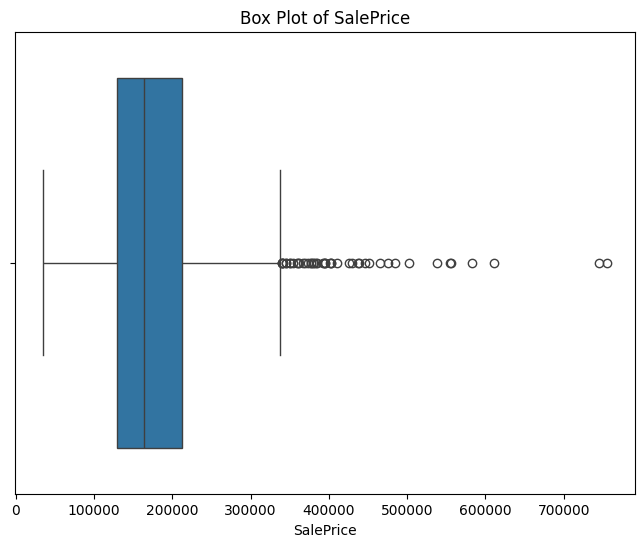

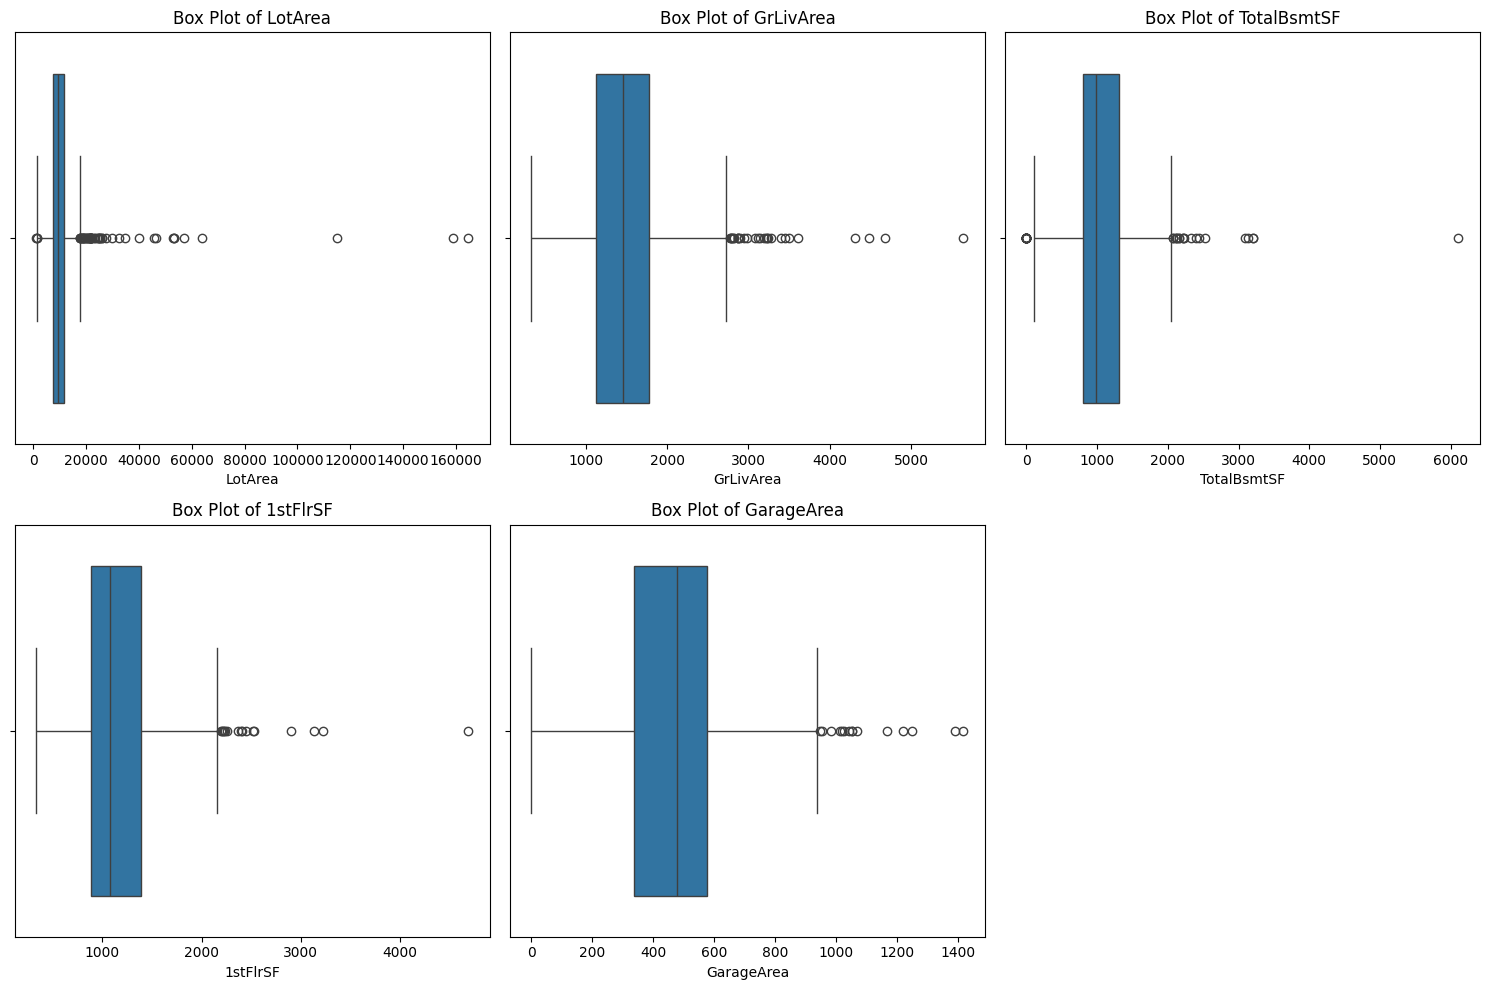

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예측 대상인 'SalePrice'의 이상치 확인
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.show()

# 다른 주요 숫자형 컬럼들의 이상치 확인 (예시)
# LotArea, GrLivArea, TotalBsmtSF 등
numerical_cols_to_plot = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

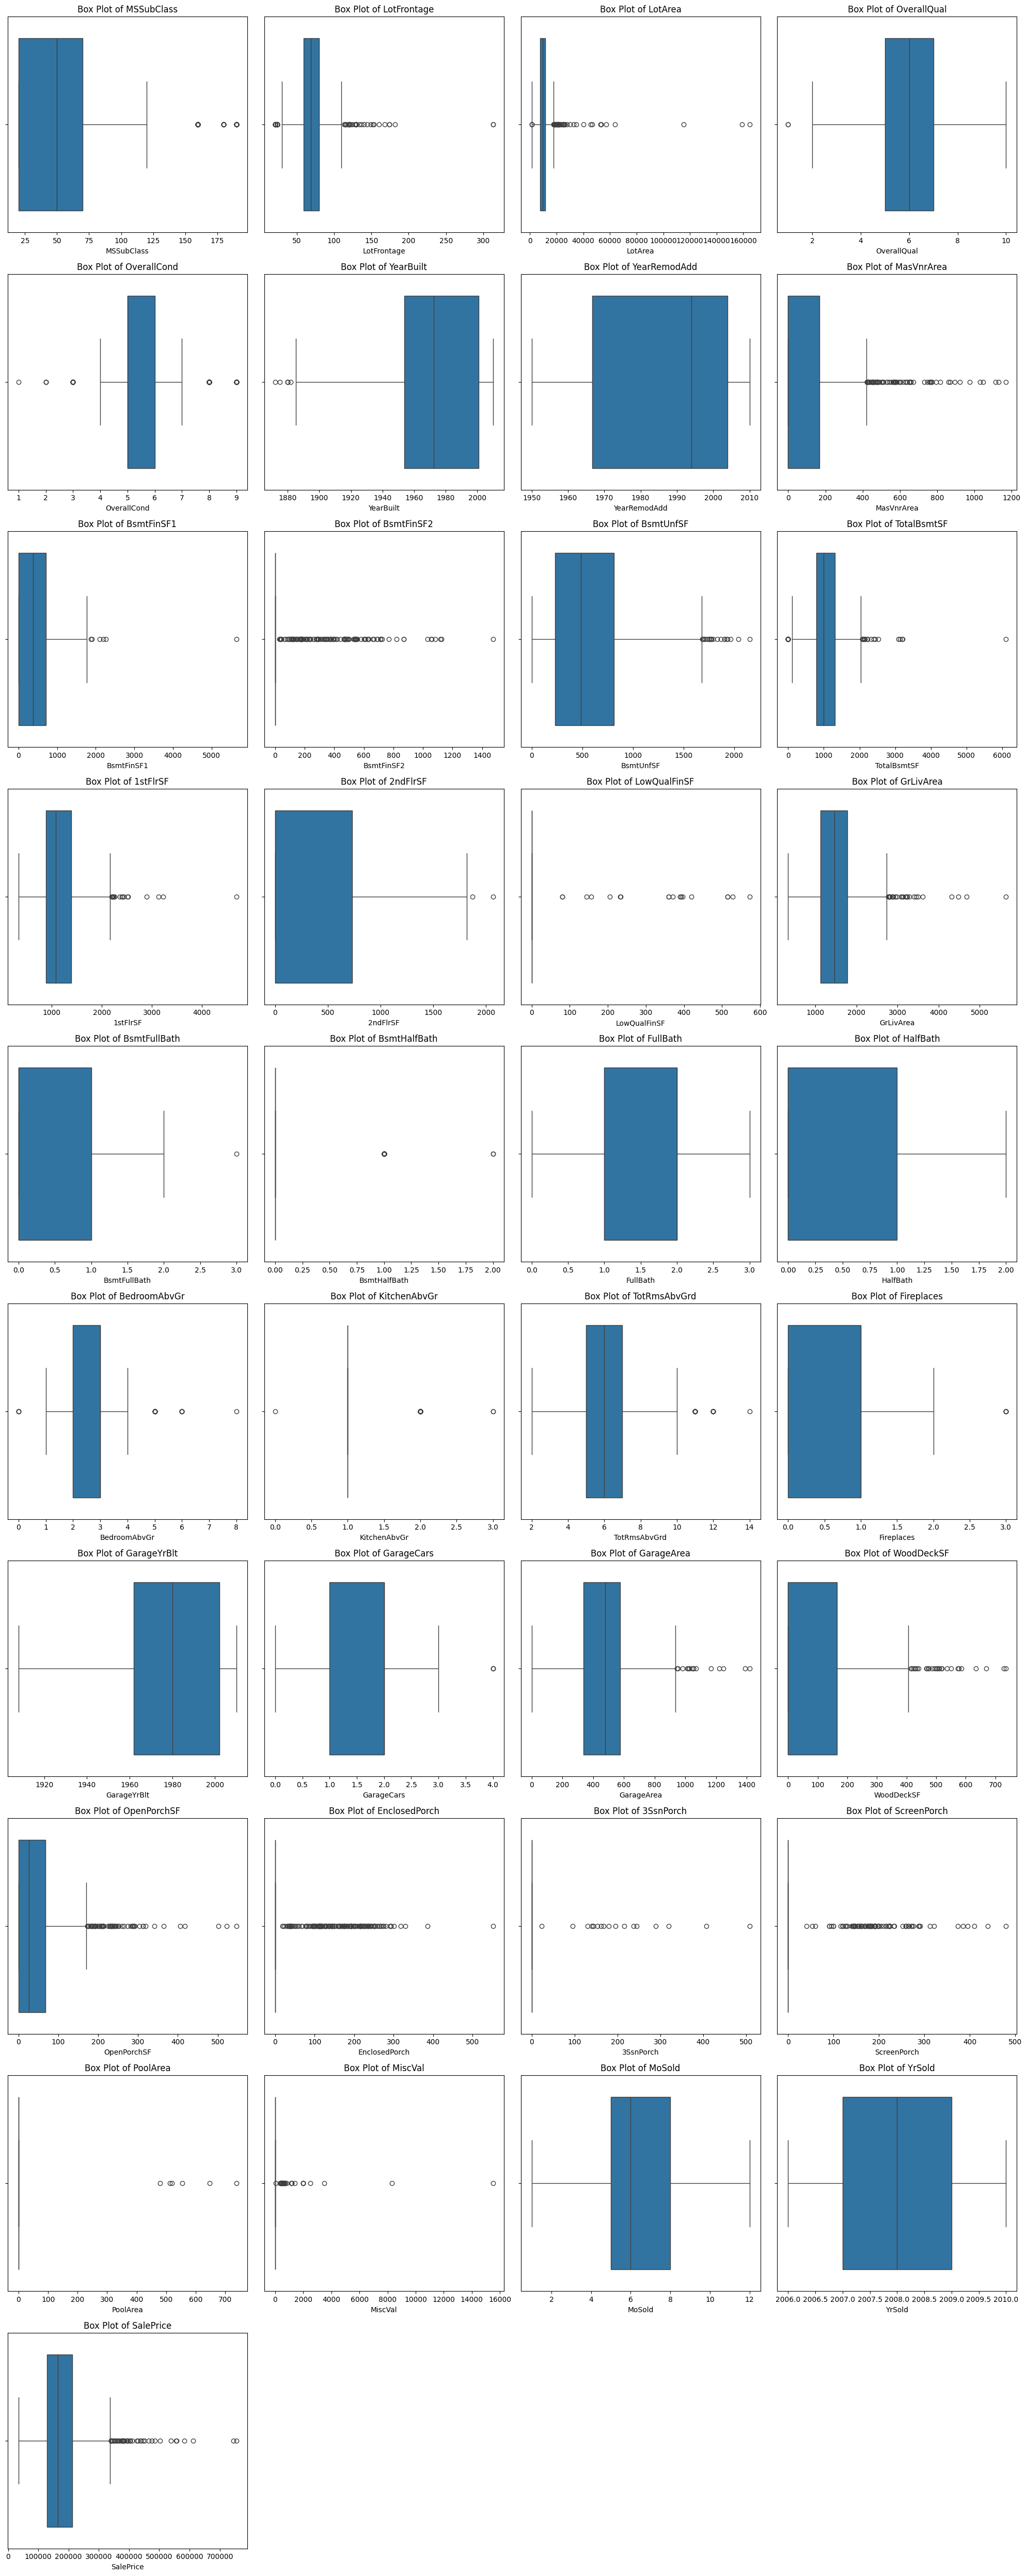

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 데이터 타입별 컬럼 분리
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# 'Id' 컬럼은 예측에 사용되지 않으므로 제외
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
# 'SalePrice'는 타겟 변수이므로 별도로 확인했거나, 다른 변수들과 함께 확인 가능
# 여기서는 'SalePrice' 포함하여 모든 숫자형 컬럼 시각화

# 플롯을 그릴 컬럼 수
n_cols = len(numerical_cols)

# 한 줄에 표시할 플롯 개수 설정
n_cols_per_row = 4
n_rows = math.ceil(n_cols / n_cols_per_row)

plt.figure(figsize=(20, n_rows * 5)) # 전체 그림 크기 설정

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols_per_row, i + 1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout() # 플롯 간 간격 자동 조정
plt.show()

이상치 제거

--- 이상치 제거 전 학습 데이터 shape ---
(1168, 81)

'LotArea' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 54
  - 이상치 인덱스 (일부): [49, 64, 73, 103, 107, 134, 162, 164, 173, 174]...

'GrLivArea' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 28
  - 이상치 인덱스 (일부): [64, 68, 107, 165, 267, 317, 373, 399, 408, 422]...

'TotalBsmtSF' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 42
  - 이상치 인덱스 (일부): [37, 62, 64, 66, 76, 122, 157, 179, 250, 255]...

'1stFlrSF' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 16
  - 이상치 인덱스 (일부): [64, 134, 157, 241, 250, 373, 400, 472, 579, 647]...

'GarageArea' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 15
  - 이상치 인덱스 (일부): [64, 165, 179, 204, 266, 274, 277, 487, 560, 573]...

'SalePrice' 컬럼 이상치 확인 및 제거:
  - 이상치 개수: 46
  - 이상치 인덱스 (일부): [74, 76, 80, 116, 157, 165, 179, 184, 219, 250]...

--- 총 이상치로 식별된 행 개수 (중복 포함): 141 ---
--- 이상치 제거 후 학습 데이터 shape ---
(1027, 81)
제거된 행 개수: 141

테스트 데이터는 이상치 행을 제거하지 않습니다.

--- 이상치 제거 전후 분포 비교 (선택된 컬럼) ---


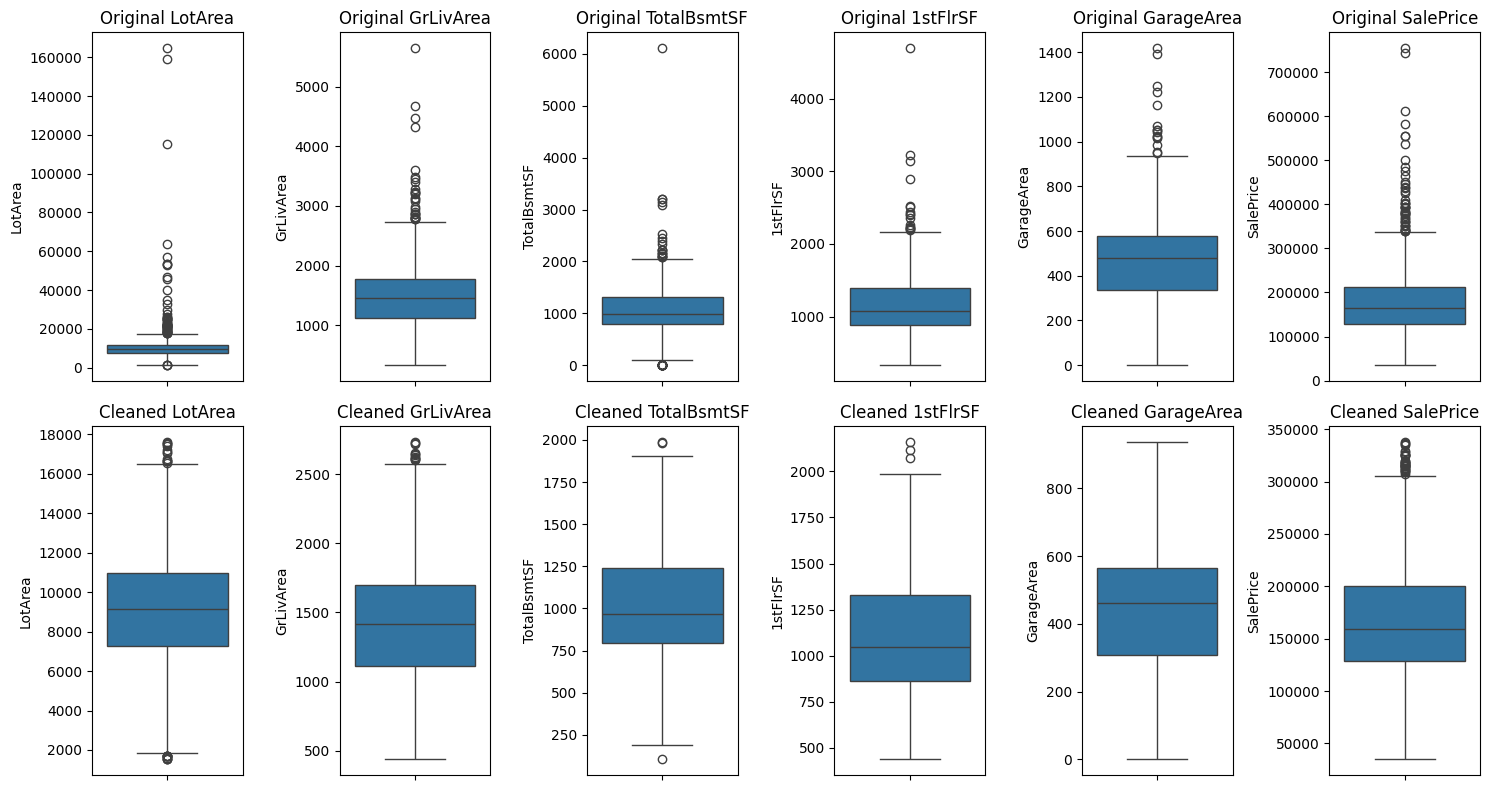

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 이상치 제거를 적용할 컬럼 목록
cols_to_remove_outliers = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'SalePrice']

print("--- 이상치 제거 전 학습 데이터 shape ---")
print(train_df.shape)

# 학습 데이터에서 이상치 제거 (IQR 방법)
# 각 컬럼별로 이상치 기준을 계산하고 해당 행을 제거합니다.
outlier_indices = np.array([], dtype=int)

for col in cols_to_remove_outliers:
    if col in train_df.columns:
        print(f"\n'{col}' 컬럼 이상치 확인 및 제거:")
        # 1사분위수 (Q1)와 3사분위수 (Q3) 계산
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1

        # 이상치 기준 설정 (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이상치에 해당하는 행의 인덱스 찾기
        col_outlier_indices = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)].index
        print(f"  - 이상치 개수: {len(col_outlier_indices)}")
        print(f"  - 이상치 인덱스 (일부): {col_outlier_indices[:10].tolist()}...")


        # 이상치 인덱스를 누적합니다. 중복 제거를 위해 마지막에 unique 적용
        outlier_indices = np.append(outlier_indices, col_outlier_indices)

# 누적된 이상치 인덱스에서 중복 제거
outlier_indices = np.unique(outlier_indices)

print(f"\n--- 총 이상치로 식별된 행 개수 (중복 포함): {len(outlier_indices)} ---")

# 이상치 행 제거
train_df_cleaned = train_df.drop(outlier_indices, axis=0).reset_index(drop=True)

print("--- 이상치 제거 후 학습 데이터 shape ---")
print(train_df_cleaned.shape)
print(f"제거된 행 개수: {train_df.shape[0] - train_df_cleaned.shape[0]}")


# NOTE: 테스트 데이터는 제출 형식 유지를 위해 행을 제거하지 않습니다.
print("\n테스트 데이터는 이상치 행을 제거하지 않습니다.")

# 시각화 (이상치 제거 전후 비교)
print("\n--- 이상치 제거 전후 분포 비교 (선택된 컬럼) ---")
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_remove_outliers):
    if col in train_df.columns: # 원본 train_df에 컬럼이 있어야 함
        plt.subplot(2, len(cols_to_remove_outliers), i + 1)
        sns.boxplot(y=train_df[col])
        plt.title(f'Original {col}')

        if col in train_df_cleaned.columns: # 제거 후 train_df에 컬럼이 있어야 함
             plt.subplot(2, len(cols_to_remove_outliers), i + len(cols_to_remove_outliers) + 1)
             sns.boxplot(y=train_df_cleaned[col])
             plt.title(f'Cleaned {col}')
        else:
             # 만약 컬럼 자체가 제거되었다면 (예: VIF 삭제 등) 박스플롯을 그릴 수 없음
             print(f"경고: '{col}' 컬럼이 이상치 제거 후 데이터프레임에 없습니다. 시각화 건너뜀.")


plt.tight_layout()
plt.show()

# 이상치가 제거된 새로운 학습 데이터프레임 사용
train_df = train_df_cleaned

#### 그룹1) 큰 이상치 칼럼은 로그 변환

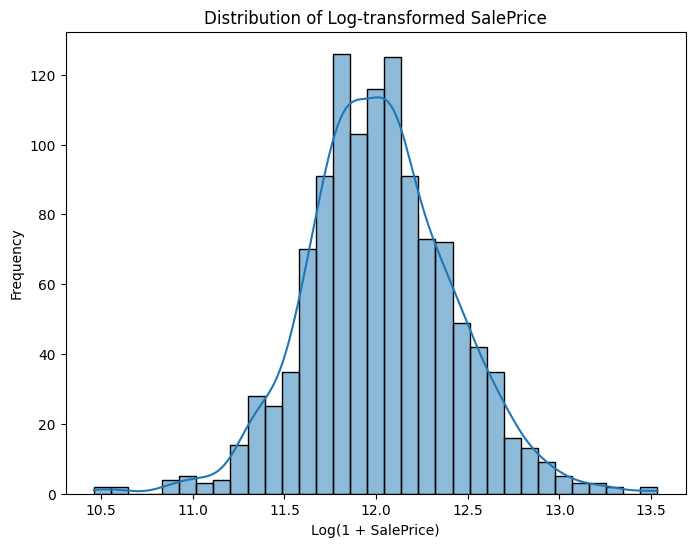

,SalePrice
0,11.813037
1,12.095147
2,12.078245
3,12.669810
4,11.719134


In [5]:
# 로그 변환을 적용할 컬럼 목록
cols_to_log_transform = [
    #'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'SalePrice'
    'SalePrice'
]

# train_df에 로그 변환 적용
for col in cols_to_log_transform:
    # 값이 0인 경우를 위해 log1p 사용 (log(1+x))
    if col in train_df.columns:
        train_df[col] = np.log1p(train_df[col])

# 변환 결과 확인 (예: SalePrice 분포 변화)
plt.figure(figsize=(8, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('Log(1 + SalePrice)')
plt.ylabel('Frequency')
plt.show()

# 변환된 데이터의 일부 확인
display(train_df[cols_to_log_transform].head())

In [7]:
# # 로그 변환을 적용할 컬럼 목록 (학습 데이터와 동일)
# cols_to_log_transform = [
#     'LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea'
#     # 'SalePrice'는 test_df에 없으므로 제외
# ]

# # test_df에 로그 변환 적용
# for col in cols_to_log_transform:
#     if col in test_df.columns: # 혹시 컬럼이 없는 경우를 대비하여 확인
#         # 값이 0인 경우를 위해 log1p 사용 (log(1+x))
#         test_df[col] = np.log1p(test_df[col])

# print("테스트 데이터셋에 로그 변환 적용 완료.")
# # 변환된 테스트 데이터의 일부 확인
# display(test_df[cols_to_log_transform].head())

테스트 데이터셋에 로그 변환 적용 완료.


,LotArea,GrLivArea,TotalBsmtSF,1stFlrSF,GarageArea
0,9.684087,7.790696,7.161622,7.171657,6.137727
1,9.205428,7.832411,7.093405,7.102499,6.582025
2,9.158099,7.364547,6.693324,6.865891,5.484797
3,9.239996,7.444833,6.357842,6.805723,6.175867
4,9.045584,7.104144,6.725034,6.725034,5.820083


#### 그룹2) 유/무를 나타내는경우(대부분의 값이 0) 이진칼럼 생성

In [6]:
# 그룹 2 컬럼 목록
cols_to_binary = ['PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal']

# train_df에 이진 컬럼 생성 및 기존 컬럼 삭제
for col in cols_to_binary:
    # 값이 0보다 크면 1, 아니면 0으로 이진 컬럼 생성
    train_df[f'Has{col}'] = (train_df[col] > 0).astype(int)
    # 기존 컬럼 삭제
    train_df = train_df.drop(col, axis=1)

# test_df에도 동일하게 적용
for col in cols_to_binary:
    # 값이 0보다 크면 1, 아니면 0으로 이진 컬럼 생성
    test_df[f'Has{col}'] = (test_df[col] > 0).astype(int)
    # 기존 컬럼 삭제
    test_df = test_df.drop(col, axis=1)

print("이진 컬럼 생성 및 기존 컬럼 삭제 완료.")
# 변경된 데이터프레임 컬럼 확인 (예시)
print("\nTrain DataFrame 컬럼:")
print(train_df.columns)
print("\nTest DataFrame 컬럼:")
print(test_df.columns)

이진 컬럼 생성 및 기존 컬럼 삭제 완료.

Train DataFrame 컬럼:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', '

### 결측치

#### 결측치 확인

In [7]:
print(train_df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       218
LotArea             0
                 ... 
SalePrice           0
HasPoolArea         0
Has3SsnPorch        0
HasScreenPorch      0
HasMiscVal          0
Length: 81, dtype: int64


#### 그룹R) 등급을 나타내는 텍스트를 숫자로 변환
- 결측치는 일단 0으로 채우긴 했는데 찜찜. 중앙/최빈값을 해야할지?

In [8]:
# Ex: Excellent (우수)
# Gd: Good (좋음)
# TA: Typical/Average (보통)
# Fa: Fair (나쁨)
# Po: Poor (매우 나쁨)

# 매핑에 사용할 품질/상태 값과 숫자
quality_values = set({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}.keys())

# 조건을 만족하는 컬럼 찾기 (모든 object 컬럼 대상)
cols_to_map = []
print("고유값에 품질/상태 등급을 포함하는 컬럼 (이름 조건 제외):")
for col in train_df.select_dtypes(include="object").columns: # 모든 object 컬럼 순회
    unique_vals = set(train_df[col].unique())
    # 고유값 중 quality_values에 해당하는 값이 2개 이상인지 확인
    if len(unique_vals.intersection(quality_values)) >= 2:
        cols_to_map.append(col)
        print(f"- {col}: {unique_vals}")

print("\n숫자로 매핑할 컬럼 (수정된 기준):", cols_to_map)

고유값에 품질/상태 등급을 포함하는 컬럼 (이름 조건 제외):
- ExterQual: {'Ex', 'Fa', 'Gd', 'TA'}
- ExterCond: {'Fa', 'Ex', 'Po', 'Gd', 'TA'}
- BsmtQual: {'Fa', 'Ex', nan, 'Gd', 'TA'}
- BsmtCond: {'Fa', 'Po', nan, 'Gd', 'TA'}
- HeatingQC: {'Fa', 'Ex', 'Po', 'Gd', 'TA'}
- KitchenQual: {'Ex', 'Fa', 'Gd', 'TA'}
- FireplaceQu: {'Fa', 'Ex', 'Po', nan, 'Gd', 'TA'}
- GarageQual: {'Fa', 'Ex', 'Po', nan, 'Gd', 'TA'}
- GarageCond: {'Fa', 'Po', nan, 'Gd', 'TA'}
- PoolQC: {'Ex', nan, 'Fa', 'Gd'}

숫자로 매핑할 컬럼 (수정된 기준): ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']


In [9]:
# 숫자로 매핑할 컬럼 목록 (이전 코드에서 찾은 컬럼들)

# 매핑에 사용할 품질/상태 값과 숫자 (결측값 포함)
quality_map_with_none = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, np.nan: 0} # 결측치는 일단 0으로 채우긴 했는데 찜찜. 중앙/최빈값을 해야할지?

# train_df에 매핑 적용
for col in cols_to_map:
    if col in train_df.columns:
        train_df[col] = train_df[col].map(quality_map_with_none)

# test_df에 매핑 적용
for col in test_df.columns: # test_df에도 동일한 컬럼이 있는지 확인하며 적용
    if col in cols_to_map:
        test_df[col] = test_df[col].map(quality_map_with_none)
        # test_df에만 있고 train_df에 없는 컬럼은 매핑 대상이 아니지만,
        # 혹시 모를 상황에 대비해 if col in cols_to_map 조건을 추가

# 매핑 결과 확인 (예: 변환된 컬럼의 일부 데이터)
print("품질/상태 컬럼 숫자 매핑 완료.")
display(train_df[cols_to_map].head())
display(test_df[cols_to_map].head())

품질/상태 컬럼 숫자 매핑 완료.


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,3,3,3,3,3,3,0,3,3,0
1,3,3,4,4,3,3,0,0,0,0
2,3,3,4,4,4,4,3,3,3,0
3,5,3,5,3,5,4,0,3,3,0
4,3,4,3,3,5,3,1,3,3,0


,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,3,3,3,0
1,4,3,4,3,5,4,3,3,3,0
2,3,3,3,3,3,2,3,3,3,0
3,3,3,3,3,4,3,0,3,3,0
4,3,3,3,3,3,3,0,3,3,0


#### 그룹A) 누락값이 '없음'을 의미할 가능성이 높은 범주형 컬럼 (숫자형 제외)은 None 입력

In [10]:
# '없음'을 의미할 가능성이 높은 범주형 컬럼 목록 (그룹 A)
cols_to_fill_none = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
    'MiscFeature'
]

# train_df 결측치를 'None'으로 채우기
for col in cols_to_fill_none:
    # 데이터 타입이 object인 경우에만 적용
    if col in train_df.columns and train_df[col].dtype == 'object':
        train_df[col] = train_df[col].fillna('None')

# test_df 결측치를 'None'으로 채우기
for col in cols_to_fill_none:
    # 데이터 타입이 object인 경우에만 적용
    if col in test_df.columns and test_df[col].dtype == 'object':
        test_df[col] = test_df[col].fillna('None')

print("그룹 A 범주형 컬럼의 결측치를 'None'으로 채웠습니다.")


그룹 A 범주형 컬럼의 결측치를 'None'으로 채웠습니다.


In [11]:
# 변경사항 확인 (예: 특정 컬럼의 고유값)
print("그룹 A 컬럼들의 모든 고유값:")
for col in cols_to_fill_none:
    if col in train_df.columns: # 현재 데이터프레임에 컬럼이 있는지 확인
        print(f"- {col}: {train_df[col].unique()}")
    else:
        print(f"- {col}: 데이터프레임에 해당 컬럼이 없습니다.")

그룹 A 컬럼들의 모든 고유값:
- Alley: ['None' 'Pave' 'Grvl']
- MasVnrType: ['BrkFace' 'None' 'Stone' 'BrkCmn']
- BsmtQual: [3 4 5 0 2]
- BsmtCond: [3 4 0 2 1]
- BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
- BsmtFinType1: ['ALQ' 'GLQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
- BsmtFinType2: ['Unf' 'LwQ' 'BLQ' 'Rec' 'None' 'ALQ' 'GLQ']
- FireplaceQu: [0 3 1 4 2 5]
- GarageType: ['Attchd' 'None' 'Detchd' 'BuiltIn' 'Basment' '2Types' 'CarPort']
- GarageFinish: ['Unf' 'None' 'Fin' 'RFn']
- GarageQual: [3 0 2 4 1 5]
- GarageCond: [3 0 2 1 4]
- PoolQC: [0 4 5 2]
- Fence: ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
- MiscFeature: ['None' 'Shed' 'Gar2' 'Othr' 'TenC']


#### 그룹B) 숫자형중 '없음'을 의미하는 값은 0으로 채움

In [12]:
# 그룹 B 컬럼 목록
cols_to_fill_zero = ['MasVnrArea', 'GarageYrBlt']

# train_df 결측치를 0으로 채우기
for col in cols_to_fill_zero:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)

# test_df 결측치를 0으로 채우기
for col in cols_to_fill_zero:
    if col in test_df.columns: # test_df에도 동일한 컬럼이 있는지 확인하며 적용
        test_df[col] = test_df[col].fillna(0)

print("그룹 B 숫자형 컬럼의 결측치를 0으로 채웠습니다.")

# 변경사항 확인 (예: MasVnrArea 컬럼의 결측치 개수)
print("\nTrain DataFrame MasVnrArea 결측치 개수:", train_df['MasVnrArea'].isnull().sum())
print("Test DataFrame MasVnrArea 결측치 개수:", test_df['MasVnrArea'].isnull().sum())

그룹 B 숫자형 컬럼의 결측치를 0으로 채웠습니다.

Train DataFrame MasVnrArea 결측치 개수: 0
Test DataFrame MasVnrArea 결측치 개수: 0


In [13]:
print("Train DataFrame 남은 결측치:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\n" + "="*30 + "\n")

print("Test DataFrame 남은 결측치:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Train DataFrame 남은 결측치:
LotFrontage    218
Electrical       1
dtype: int64


Test DataFrame 남은 결측치:
LotFrontage    41
dtype: int64


#### 임의로 누락되었을 가능성이 있거나 '없음'으로 보기 어려운 숫자형 컬럼

In [14]:
# LotFrontage 결측치를 동일 Neighborhood의 중앙값으로 대체

# train_df 결측치 대체
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# test_df 결측치 대체
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

print("LotFrontage 결측치를 동일 Neighborhood의 중앙값으로 대체 완료.")

# 변경사항 확인 (LotFrontage 결측치 개수)
print("\nTrain DataFrame LotFrontage 결측치 개수:", train_df['LotFrontage'].isnull().sum())
print("Test DataFrame LotFrontage 결측치 개수:", test_df['LotFrontage'].isnull().sum())

# 혹시 Neighborhood 그룹 자체가 결측치만 있는 경우(거의 없겠지만)를 대비해
# 남아있는 LotFrontage 결측치는 전체 데이터셋의 중앙값으로 대체
train_median_lotfrontage = train_df['LotFrontage'].median()
test_median_lotfrontage = test_df['LotFrontage'].median()

train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_median_lotfrontage)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_median_lotfrontage)

print("남아있는 LotFrontage 결측치 (전체 중앙값 대체) 확인:")
print("Train DataFrame LotFrontage 결측치 개수:", train_df['LotFrontage'].isnull().sum())
print("Test DataFrame LotFrontage 결측치 개수:", test_df['LotFrontage'].isnull().sum())

LotFrontage 결측치를 동일 Neighborhood의 중앙값으로 대체 완료.

Train DataFrame LotFrontage 결측치 개수: 0
Test DataFrame LotFrontage 결측치 개수: 0
남아있는 LotFrontage 결측치 (전체 중앙값 대체) 확인:
Train DataFrame LotFrontage 결측치 개수: 0
Test DataFrame LotFrontage 결측치 개수: 0


#### 그밖에 결측 컬럼 처리

In [15]:
# Electrical 컬럼의 최빈값 계산 (train_df)
electrical_mode = train_df['Electrical'].mode()[0]

# train_df의 Electrical 결측치를 최빈값으로 대체
train_df['Electrical'] = train_df['Electrical'].fillna(electrical_mode)

print("Electrical 컬럼의 결측치를 최빈값으로 대체 완료.")

# 변경사항 확인 (Electrical 결측치 개수)
print("\nTrain DataFrame Electrical 결측치 개수:", train_df['Electrical'].isnull().sum())

Electrical 컬럼의 결측치를 최빈값으로 대체 완료.

Train DataFrame Electrical 결측치 개수: 0


### 원핫인코딩

In [16]:
# 범주형 컬럼 선택
object_cols = train_df.select_dtypes(include="object").columns

# train_df 원-핫 인코딩
train_df = pd.get_dummies(train_df, columns=object_cols, drop_first=True)

# test_df 원-핫 인코딩
test_df = pd.get_dummies(test_df, columns=object_cols, drop_first=True)

print("원-핫 인코딩 완료.")

# 학습 데이터와 테스트 데이터의 컬럼 일치시키기
# 학습 데이터에만 있는 컬럼은 테스트 데이터에 0으로 채워 추가
train_cols = train_df.columns
test_cols = test_df.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    if c != 'SalePrice': # SalePrice는 예측 대상이므로 test_df에 없음
        test_df[c] = 0

# 테스트 데이터에만 있는 컬럼은 학습 데이터에 0으로 채워 추가 (거의 없겠지만 안전을 위해)
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
     train_df[c] = 0


# 컬럼 순서 일치시키기 (SalePrice는 마지막에 오도록)
if 'SalePrice' in train_df.columns:
    sale_price = train_df['SalePrice']
    train_df = train_df.drop('SalePrice', axis=1)
    train_df = train_df[test_df.columns] # test_df 기준으로 컬럼 순서 맞추기
    train_df['SalePrice'] = sale_price # SalePrice 다시 추가
else: # test_df만 있는 경우 (예: SalePrice 제외)
    train_df = train_df[test_df.columns]


print("학습 데이터와 테스트 데이터의 컬럼 일치 완료.")
print("\nTrain DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

원-핫 인코딩 완료.
학습 데이터와 테스트 데이터의 컬럼 일치 완료.

Train DataFrame shape: (1168, 236)
Test DataFrame shape: (292, 235)


### 상관관계, 다중공선성

In [19]:
# # 숫자형 컬럼 선택 (Id는 제외)
# numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# if 'Id' in numerical_cols:
#     numerical_cols.remove('Id')

# # 상관 행렬 계산
# corr_matrix = train_df[numerical_cols].corr()

# # 'SalePrice'와의 상관관계 출력
# print("Correlation with SalePrice:")
# display(corr_matrix['SalePrice'].sort_values(ascending=False))

# # 상관 행렬 히트맵 시각화 (전체)
# plt.figure(figsize=(15, 12))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()

# # SalePrice와의 상관관계 히트맵 시각화 (상위/하위 컬럼)
# # 상관관계 절대값 기준으로 정렬
# corr_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

# plt.figure(figsize=(8, 10))
# sns.heatmap(corr_with_saleprice.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
# plt.title('Correlation of Features with SalePrice')
# plt.yticks(rotation=0)
# plt.show()

In [20]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# import pandas as pd

# # 타겟 변수 분리 (SalePrice)
# X = train_df.drop('SalePrice', axis=1)

# # 상수항 추가 (VIF 계산을 위해 필요)
# X = add_constant(X)

# # VIF 계산 전에 모든 컬럼을 float 타입으로 변환
# X = X.astype(float)

# # VIF 계산
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                    for i in range(X.shape[1])]

# # VIF 값 정렬하여 출력 (상수항 제외)
# print("Variance Inflation Factor (VIF):")
# display(vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)[1:]) # 상수항(const) 제외

In [21]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# import pandas as pd
# import numpy as np

# # 타겟 변수 분리 (SalePrice)
# X = train_df.drop('SalePrice', axis=1)

# # VIF 계산 함수 정의
# def calculate_vif(df):
#     # 상수항 추가
#     X_with_const = add_constant(df.astype(float), has_constant='add') # 이미 상수항이 있으면 추가하지 않도록 'add' 사용

#     # VIF 계산 (RuntimeWarning 방지)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X_with_const.columns
#     # 무한대나 NaN 값을 가진 컬럼 제외하고 계산
#     vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
#                        if np.isfinite(variance_inflation_factor(X_with_const.values, i)) else np.inf
#                        for i in range(X_with_const.shape[1])]

#     # 상수항 제외하고 정렬
#     vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
#     return vif_data[vif_data['feature'] != 'const']

# # 초기 VIF 계산
# vif_result = calculate_vif(X)

# print("--- 초기 VIF ---")
# display(vif_result.head())

# # VIF 임계값 설정
# vif_threshold = 10

# # 다중공선성 해결 (VIF > 임계값인 피처 제거)
# high_vif_features = vif_result[vif_result['VIF'] > vif_threshold]['feature'].tolist()
# removed_features = []

# while len(high_vif_features) > 0:
#     # VIF가 가장 높은 피처 (무한대 포함) 선택
#     feature_to_remove = vif_result.iloc[0]['feature'] # 가장 위에 있는 (VIF가 가장 높은) 피처 선택

#     # 해당 피처 제거
#     if feature_to_remove in X.columns:
#         X = X.drop(feature_to_remove, axis=1)
#         removed_features.append(feature_to_remove)
#         print(f"\n--- 제거된 피처: {feature_to_remove} (VIF: {vif_result.iloc[0]['VIF']:.2f}) ---")

#         # 제거 후 VIF 다시 계산
#         vif_result = calculate_vif(X)

#         # VIF > 임계값인 피처 목록 업데이트
#         high_vif_features = vif_result[vif_result['VIF'] > vif_threshold]['feature'].tolist()
#         print("\n--- 제거 후 VIF (상위 5개) ---")
#         display(vif_result.head())
#     else:
#         # 이미 제거되었거나 존재하지 않는 피처 (안전 장치)
#         print(f"\n--- 피처 {feature_to_remove}가 이미 제거되었거나 존재하지 않습니다. ---")
#         # VIF 목록에서 해당 피처 제거 후 다시 시작
#         vif_result = calculate_vif(X) # 피처 제거 후 다시 계산하여 정확한 VIF 목록 반영
#         high_vif_features = vif_result[vif_result['VIF'] > vif_threshold]['feature'].tolist()
#         if len(vif_result) > 0:
#              print("\n--- 제거 후 VIF (상위 5개) ---")
#              display(vif_result.head())
#         else:
#             print("\n--- 남은 피처가 없습니다. ---")
#             break # 남은 피처가 없으면 종료


# print("\n--- 다중공선성 해결 완료 ---")
# print("최종 피처 개수:", X.shape[1])
# print("제거된 피처 목록:", removed_features)
# print("남은 피처들의 VIF (상위 10개):")
# display(vif_result.head(10))

# # 최종 피처 목록 업데이트
# final_features = X.columns.tolist()

#### VIF : 16분 소요후 20여개 제거 > but PCA를 하는게 낫지 않을까?
- 제거된 피처 목록: ['GarageFinish_None', 'Exterior1st_CBlock', 'RoofMatl_Membran', 'Heating_GasA', 'RoofStyle_Shed', 'GarageYrBlt', 'RoofStyle_Gable', 'Exterior1st_VinylSd', 'TotalBsmtSF', 'GarageType_Attchd', 'MiscFeature_None', 'GarageArea', 'MSZoning_RL', 'BsmtFinType1_None', 'RoofMatl_CompShg', 'Exterior2nd_MetalSd', 'GrLivArea', 'SaleType_New', 'MSSubClass', 'Exterior1st_CemntBd', 'MasVnrType_None', 'GarageCond', 'HasMiscVal', 'Neighborhood_NAmes', 'Exterior2nd_VinylSd', 'HasPoolArea', 'BsmtFinType2_Unf', '2ndFlrSF', 'Exterior1st_HdBoard', 'BsmtExposure_None', 'GarageType_None', 'YearBuilt']

#### VIF 10이상 한번에 제거

In [22]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# import pandas as pd
# import numpy as np

# # 타겟 변수 분리 (SalePrice)
# # train_df는 이미 전처리 및 파생변수 추가가 완료된 상태입니다.
# X = train_df.drop('SalePrice', axis=1)

# # VIF 계산 함수 정의
# def calculate_vif(df):
#     # 상수항 추가
#     X_with_const = add_constant(df.astype(float), has_constant='add')

#     # VIF 계산 (RuntimeWarning 방지)
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X_with_const.columns
#     # 무한대나 NaN 값을 가진 컬럼 제외하고 계산
#     # isfinite 검사를 통해 오류 방지 및 무한대 VIF 처리
#     vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
#                        if np.isfinite(variance_inflation_factor(X_with_const.values, i)) else np.inf
#                        for i in range(X_with_const.shape[1])]

#     # 상수항 제외하고 정렬
#     vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
#     return vif_data[vif_data['feature'] != 'const']

# # 초기 VIF 계산
# print("--- 초기 VIF 계산 중 ---")
# vif_result = calculate_vif(X)

# print("\n--- 초기 VIF (상위 20개) ---")
# display(vif_result.head(20))

# # VIF 임계값 설정
# vif_threshold = 10

# # VIF > 임계값인 피처 목록 추출 (한 번만 제거)
# high_vif_features_to_drop = vif_result[vif_result['VIF'] > vif_threshold]['feature'].tolist()

# print(f"\n--- VIF > {vif_threshold} 인 피처 목록 (제거 예정) ---")
# print(high_vif_features_to_drop)
# print(f"제거할 피처 개수: {len(high_vif_features_to_drop)}")

# # 학습 데이터에서 해당 피처들 제거 (한 번에)
# features_actually_dropped = []
# for feature in high_vif_features_to_drop:
#     if feature in X.columns:
#         X = X.drop(feature, axis=1)
#         features_actually_dropped.append(feature)
#     else:
#         print(f"경고: '{feature}' 컬럼이 이미 데이터프레임에 없습니다.")


# print("\n--- VIF > 10 인 피처 제거 완료 ---")
# print(f"실제로 제거된 피처 목록: {features_actually_dropped}")
# print(f"제거 후 피처 개수: {X.shape[1]}")

# # 제거 후 남은 피처들의 VIF 다시 계산 및 확인
# print("\n--- 피처 제거 후 남은 피처들의 VIF (상위 20개) ---")
# # 제거 후 데이터프레임 X를 사용하여 VIF 다시 계산
# vif_result_after_dropping = calculate_vif(X)
# display(vif_result_after_dropping.head(20))

# # 최종 학습 데이터 특성 업데이트
# X_train_processed = X.copy()
# y_train_processed = train_df['SalePrice'].copy() # SalePrice는 그대로 사용

# print("\n다중공선성 해결 (VIF > 10 피처 1회 제거) 완료.")
# print("처리된 학습 데이터 특성 shape:", X_train_processed.shape)
# print("처리된 학습 데이터 타겟 shape:", y_train_processed.shape)

--- 초기 VIF 계산 중 ---


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



--- 초기 VIF (상위 20개) ---


,feature,VIF
0,HasPoolArea,inf
1,Total_sqr_footage,inf
2,Total_Bathrooms,inf
3,TotalSF,inf
4,YrBltAndRemod,inf
5,Total_porch_sf,inf
6,GarageFinish_None,inf
7,BsmtFinType1_None,inf
8,PoolQC_None,inf
9,Exterior2nd_CBlock,inf



--- VIF > 10 인 피처 목록 (제거 예정) ---
['HasPoolArea', 'Total_sqr_footage', 'Total_Bathrooms', 'TotalSF', 'YrBltAndRemod', 'Total_porch_sf', 'GarageFinish_None', 'BsmtFinType1_None', 'PoolQC_None', 'Exterior2nd_CBlock', 'Exterior1st_CBlock', 'GarageType_None', 'Heating_GasA', 'Heating_Wall', 'RoofStyle_Shed', 'RoofMatl_Membran', 'Foundation_Slab', 'BsmtFinType2_None', 'GarageYrBlt', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'Exterior1st_MetalSd', 'Exterior1st_HdBoard', 'GarageArea', 'MiscFeature_None', 'Exterior2nd_MetalSd', 'GarageType_Attchd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'GarageType_Detchd', 'Exterior2nd_Wd Sdng', 'Exterior1st_CemntBd', 'BsmtUnfSF', 'HasMiscVal', 'Exterior2nd_CmentBd', 'BsmtFinSF1', 'MSZoning_RL', 'Exterior2nd_Plywood', 'GrLivArea', 'Exterior1st_Plywood', 'MSZoning_RM', '2ndFlrSF', 'SaleType_New', 'MSSubClass', 'SaleCondition_Partial', 'MiscFeature_Shed', '1stFlrSF', 'MasVnrType_None', 'MasVnrType_BrkFace', 'TotalB

,feature,VIF
1,Functional_Typ,7.507026
2,Foundation_PConc,6.181588
3,FireplaceQu,5.907977
4,Fence_None,5.585207
5,Fireplaces,5.463398
6,Condition1_Norm,5.353607
7,Condition2_Norm,5.173168
8,Foundation_CBlock,4.942691
9,Fence_MnPrv,4.209110
10,TotRmsAbvGrd,4.118230



다중공선성 해결 (VIF > 10 피처 1회 제거) 완료.
처리된 학습 데이터 특성 shape: (1027, 148)
처리된 학습 데이터 타겟 shape: (1027,)


### 불필요칼럼 삭제

In [23]:
# # 불필요한 컬럼 삭제 (Id)
#if 'Id' in train_df.columns:
#     train_df = train_df.drop('Id', axis=1)
# if 'Id' in test_df.columns:
#     test_df = test_df.drop('Id', axis=1)

#print("Id 컬럼 삭제 완료.")
#print("\nTrain DataFrame shape:", train_df.shape)
# print("Test DataFrame shape:", test_df.shape)

In [21]:
# 제거할 피처 목록
features_to_drop = [
    'GarageFinish_None', 'Exterior1st_CBlock', 'RoofMatl_Membran', 'Heating_GasA',
    'RoofStyle_Shed', 'GarageYrBlt', 'RoofStyle_Gable', 'Exterior1st_VinylSd',
    'TotalBsmtSF', 'GarageType_Attchd', 'MiscFeature_None', 'GarageArea',
    'MSZoning_RL', 'BsmtFinType1_None', 'RoofMatl_CompShg', 'Exterior2nd_MetalSd',
    'GrLivArea', 'SaleType_New', 'MSSubClass', 'Exterior1st_CemntBd',
    'MasVnrType_None', 'GarageCond', 'HasMiscVal', 'Neighborhood_NAmes',
    'Exterior2nd_VinylSd', 'HasPoolArea', 'BsmtFinType2_Unf', '2ndFlrSF',
    'Exterior1st_HdBoard', 'BsmtExposure_None', 'GarageType_None', 'YearBuilt'
]

# train_df에서 피처 제거
for feature in features_to_drop:
    if feature in train_df.columns:
        train_df = train_df.drop(feature, axis=1)
        print(f"train_df에서 '{feature}' 제거 완료.")
    else:
        print(f"train_df에 '{feature}' 컬럼이 없습니다. 건너뜁니다.")

# test_df에서 피처 제거
for feature in features_to_drop:
    if feature in test_df.columns:
        test_df = test_df.drop(feature, axis=1)
        print(f"test_df에서 '{feature}' 제거 완료.")
    else:
        print(f"test_df에 '{feature}' 컬럼이 없습니다. 건너뜁니다.")

print("\n지정된 피처 제거 완료.")
print("\nTrain DataFrame shape after dropping features:", train_df.shape)
print("Test DataFrame shape after dropping features:", test_df.shape)

train_df에서 'GarageFinish_None' 제거 완료.
train_df에서 'Exterior1st_CBlock' 제거 완료.
train_df에서 'RoofMatl_Membran' 제거 완료.
train_df에서 'Heating_GasA' 제거 완료.
train_df에서 'RoofStyle_Shed' 제거 완료.
train_df에서 'GarageYrBlt' 제거 완료.
train_df에서 'RoofStyle_Gable' 제거 완료.
train_df에서 'Exterior1st_VinylSd' 제거 완료.
train_df에서 'TotalBsmtSF' 제거 완료.
train_df에서 'GarageType_Attchd' 제거 완료.
train_df에서 'MiscFeature_None' 제거 완료.
train_df에서 'GarageArea' 제거 완료.
train_df에서 'MSZoning_RL' 제거 완료.
train_df에서 'BsmtFinType1_None' 제거 완료.
train_df에서 'RoofMatl_CompShg' 제거 완료.
train_df에서 'Exterior2nd_MetalSd' 제거 완료.
train_df에서 'GrLivArea' 제거 완료.
train_df에서 'SaleType_New' 제거 완료.
train_df에서 'MSSubClass' 제거 완료.
train_df에서 'Exterior1st_CemntBd' 제거 완료.
train_df에서 'MasVnrType_None' 제거 완료.
train_df에서 'GarageCond' 제거 완료.
train_df에서 'HasMiscVal' 제거 완료.
train_df에서 'Neighborhood_NAmes' 제거 완료.
train_df에서 'Exterior2nd_VinylSd' 제거 완료.
train_df에서 'HasPoolArea' 제거 완료.
train_df에서 'BsmtFinType2_Unf' 제거 완료.
train_df에서 '2ndFlrSF' 제거 완료.
train_df에서 'Exte

스케일링

### 스케일링 (StandardScaler)

In [17]:
from sklearn.preprocessing import StandardScaler

# SalePrice를 제외한 학습 데이터 특성 선택
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']
X_test = test_df.copy() # test_df는 SalePrice 컬럼이 없음

# StandardScaler 객체 생성 및 학습 데이터에 fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터에 transform 적용 (학습 데이터의 평균/표준편차 사용)
X_test_scaled = scaler.transform(X_test)

# 스케일링된 데이터를 다시 DataFrame으로 변환 (컬럼 이름 유지를 위해)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("StandardScaler 적용 완료.")
print("\n스케일링된 Train DataFrame shape:", X_train_scaled_df.shape)
print("스케일링된 Test DataFrame shape:", X_test_scaled_df.shape)

# 스케일링된 데이터의 일부 확인
print("\n스케일링된 Train DataFrame (일부):")
display(X_train_scaled_df.head())

print("\n스케일링된 Test DataFrame (일부):")
display(X_test_scaled_df.head())

StandardScaler 적용 완료.

스케일링된 Train DataFrame shape: (1168, 235)
스케일링된 Test DataFrame shape: (292, 235)

스케일링된 Train DataFrame (일부):


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Condition1_RRNn,Condition1_RRAe,SaleType_CWD,LotConfig_FR3,Condition1_RRNe,Exterior2nd_AsphShn,RoofMatl_Roll,Exterior1st_AsphShn,SaleCondition_AdjLand,Exterior1st_CBlock
0,0.576741,-0.874745,0.210478,-0.335534,-0.805358,1.245988,-0.533822,-1.451403,0.277605,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
1,0.025220,0.781175,-0.447724,0.052800,-0.805358,-0.528785,0.520563,0.144002,-0.581972,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
2,-0.078341,-0.874745,-0.711005,0.395696,-0.076730,0.358601,0.520563,0.095656,-0.172107,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
3,-1.178974,-0.874745,1.000320,0.192874,1.380524,-0.528785,1.179554,1.062568,0.863938,2.750916,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
4,0.391295,-0.165065,-0.447724,-0.258778,-0.805358,1.245988,-0.731519,1.014223,-0.581972,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273



스케일링된 Test DataFrame (일부):


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Condition1_RRNn,Condition1_RRAe,SaleType_CWD,LotConfig_FR3,Condition1_RRNe,Exterior2nd_AsphShn,RoofMatl_Roll,Exterior1st_AsphShn,SaleCondition_AdjLand,Exterior1st_CBlock
0,-1.547457,0.071495,2.228964,0.651700,1.380524,-0.528785,0.652361,0.337384,1.034715,1.024387,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
1,-1.207874,0.071495,0.517639,-0.043999,0.651897,-0.528785,0.784159,0.482421,1.068870,1.024387,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
2,-0.569652,-0.165065,0.385999,-0.096384,-0.076730,1.245988,-0.995115,-1.693131,-0.581972,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
3,-1.600441,0.308055,-0.886525,-0.004140,0.651897,0.358601,-1.654106,-1.693131,-0.581972,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273
4,-0.367347,-0.165065,0.429879,-0.211404,-0.805358,-0.528785,-0.797418,-1.693131,-0.581972,-0.702141,...,-0.065568,-0.097506,-0.058621,-0.058621,-0.041416,-0.050746,-0.029273,-0.029273,-0.058621,-0.029273


### PCA (Principal Component Analysis)

PCA 적용 완료.
유지된 주성분 개수: 146
설명된 분산 비율: 0.9506

PCA 변환된 Train DataFrame shape: (1168, 146)
PCA 변환된 Test DataFrame shape: (292, 146)


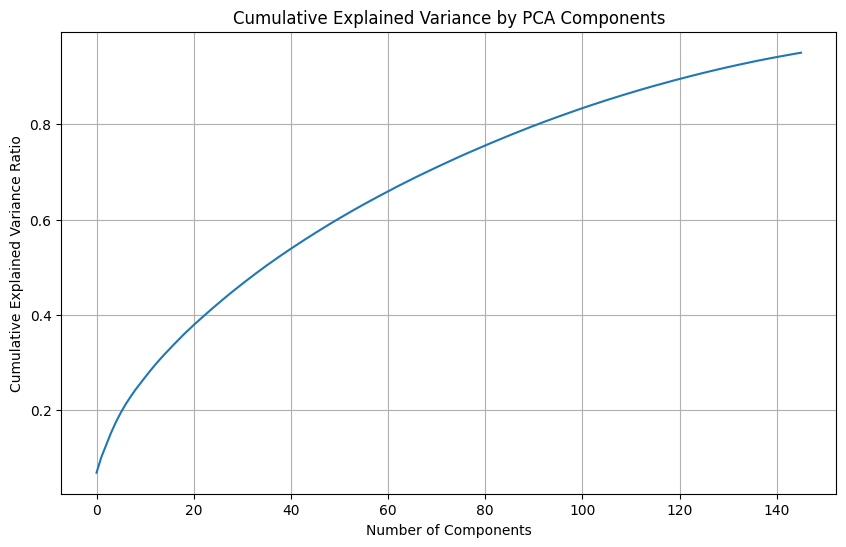

In [18]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # PCA 모델 생성 (설명된 분산 비율 95%를 목표로 설정)
# pca = PCA(n_components=0.95)

# # 스케일링된 학습 데이터에 PCA fit 및 transform
# X_train_pca = pca.fit_transform(X_train_scaled_df)

# # 테스트 데이터에 transform 적용 (학습 데이터에서 fit된 PCA 모델 사용)
# X_test_pca = pca.transform(X_test_scaled_df)

# print("PCA 적용 완료.")
# print(f"유지된 주성분 개수: {pca.n_components_}")
# print(f"설명된 분산 비율: {np.sum(pca.explained_variance_ratio_):.4f}")

# print("\nPCA 변환된 Train DataFrame shape:", X_train_pca.shape)
# print("PCA 변환된 Test DataFrame shape:", X_test_pca.shape)

# # 설명된 분산 비율 시각화
# plt.figure(figsize=(10, 6))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

# 선형회귀 적용전 확인

## 선형성

Top 8 features with highest correlation with SalePrice:
Index(['OverallQual', 'GrLivArea', 'ExterQual', 'GarageCars', 'KitchenQual',
       'GarageArea', 'FullBath', 'BsmtQual'],
      dtype='object')


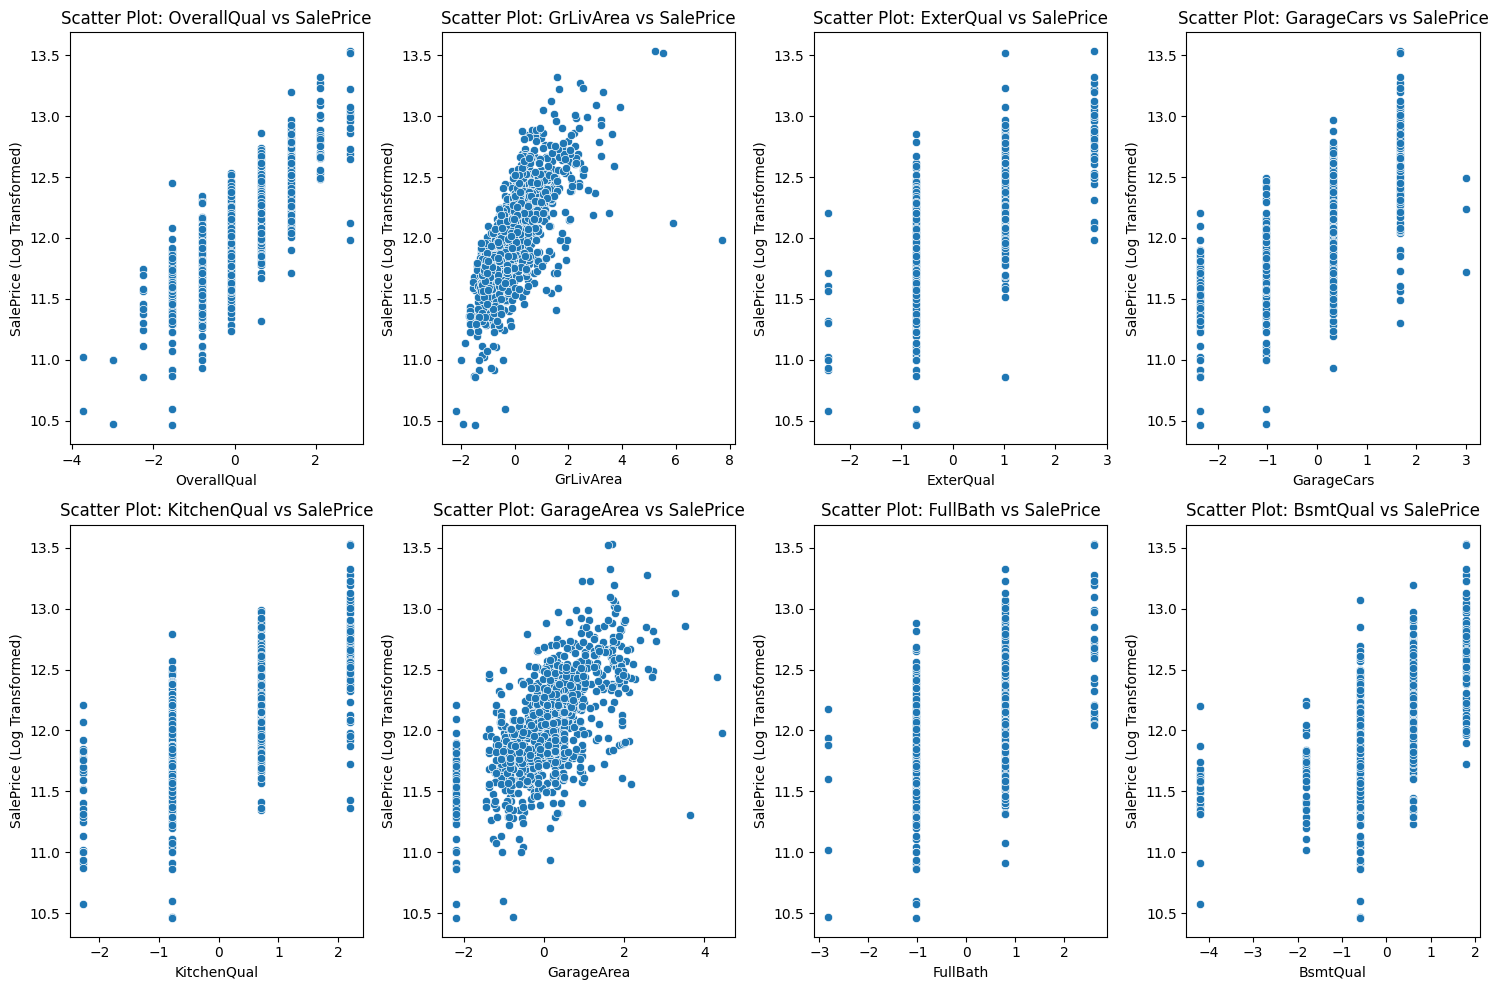

<Figure size 1200x1200 with 0 Axes>

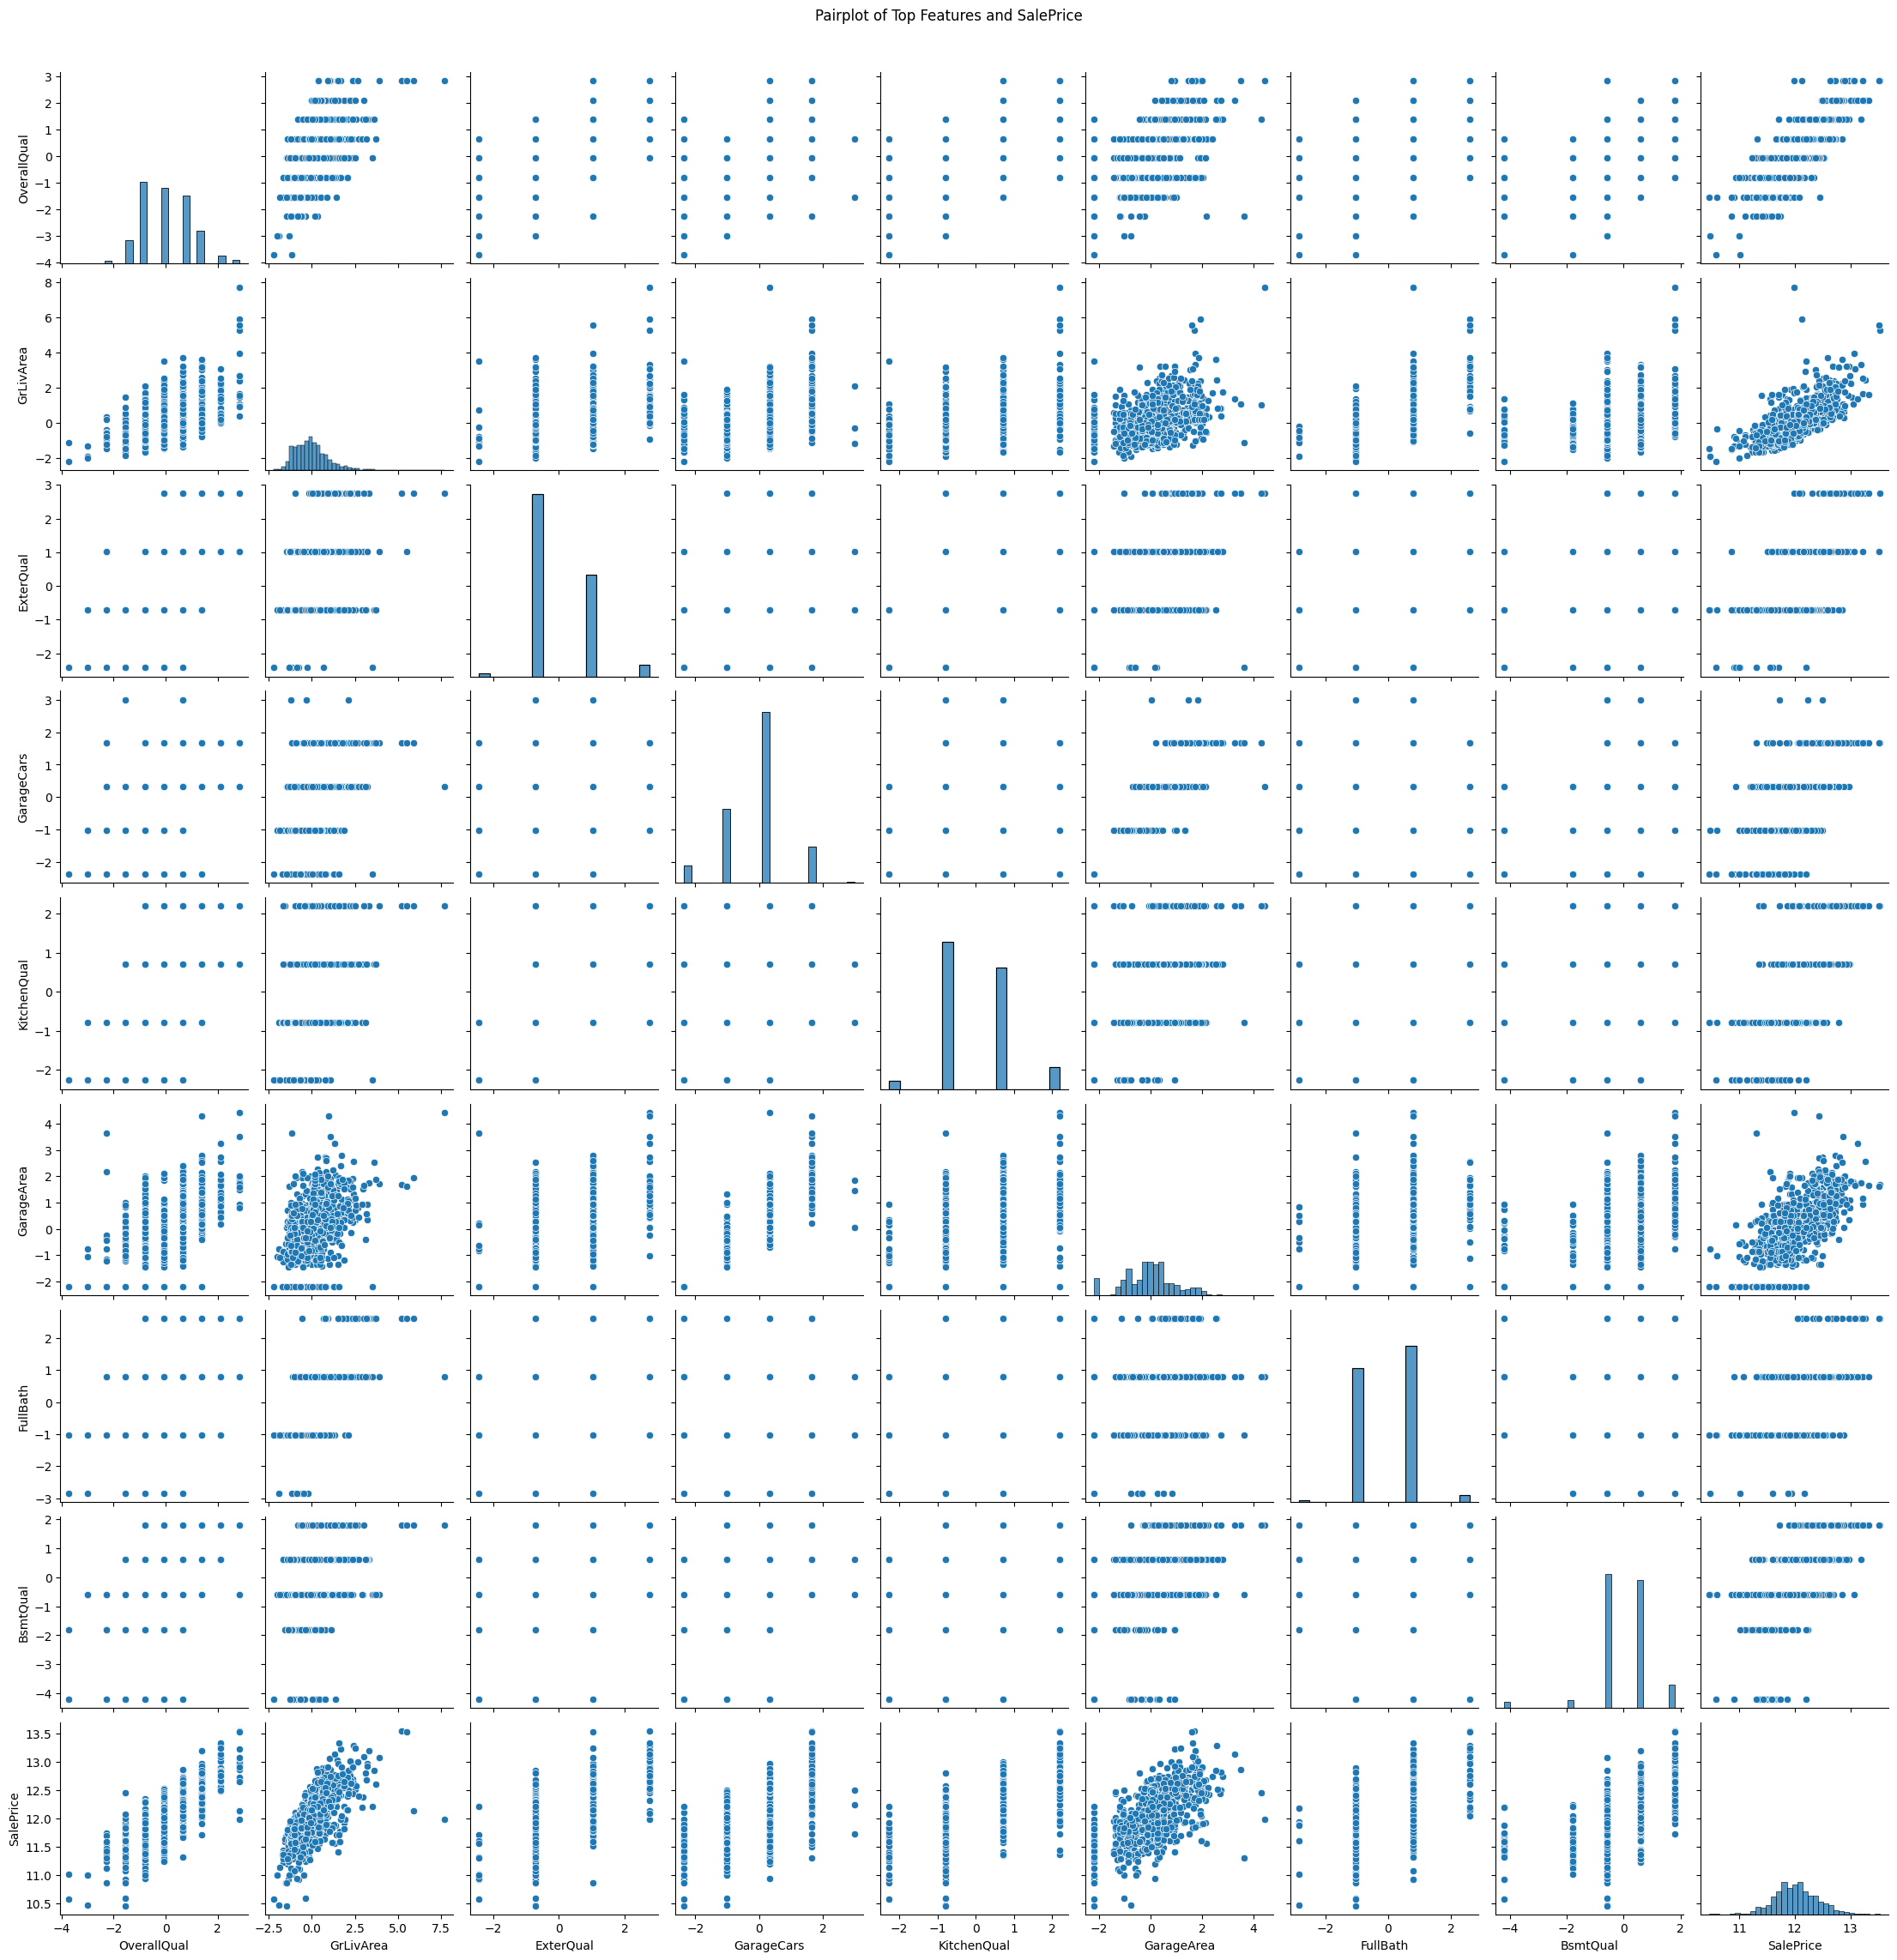

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation with SalePrice using the scaled training data
# Need to combine X_train_scaled_df and y_train for correlation calculation
train_scaled_with_target = X_train_scaled_df.copy()
train_scaled_with_target['SalePrice'] = y_train

corr_matrix_scaled = train_scaled_with_target.corr()
corr_with_saleprice_scaled = corr_matrix_scaled['SalePrice'].sort_values(ascending=False)

# Select the top N features (excluding SalePrice itself)
N = 8
top_N_features = corr_with_saleprice_scaled.index[1:N+1] # Exclude SalePrice at index 0

print(f"Top {N} features with highest correlation with SalePrice:")
print(top_N_features)

# Create scatter plots for the top N features vs SalePrice
plt.figure(figsize=(15, 10))
for i, col in enumerate(top_N_features):
    plt.subplot(2, (N + 1) // 2, i + 1) # Adjust subplot layout based on N
    sns.scatterplot(x=train_scaled_with_target[col], y=train_scaled_with_target['SalePrice'])
    plt.title(f'Scatter Plot: {col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice (Log Transformed)')

plt.tight_layout()
plt.show()

# Use pairplot for selected top features
# Select a smaller subset for pairplot due to the number of features
pairplot_cols = top_N_features.tolist() + ['SalePrice']

plt.figure(figsize=(12, 12)) # Adjust figure size for pairplot
sns.pairplot(train_scaled_with_target[pairplot_cols])
plt.suptitle('Pairplot of Top Features and SalePrice', y=1.02) # Add title
plt.show()

## 독립성

Durbin-Watson statistic: 2.0149


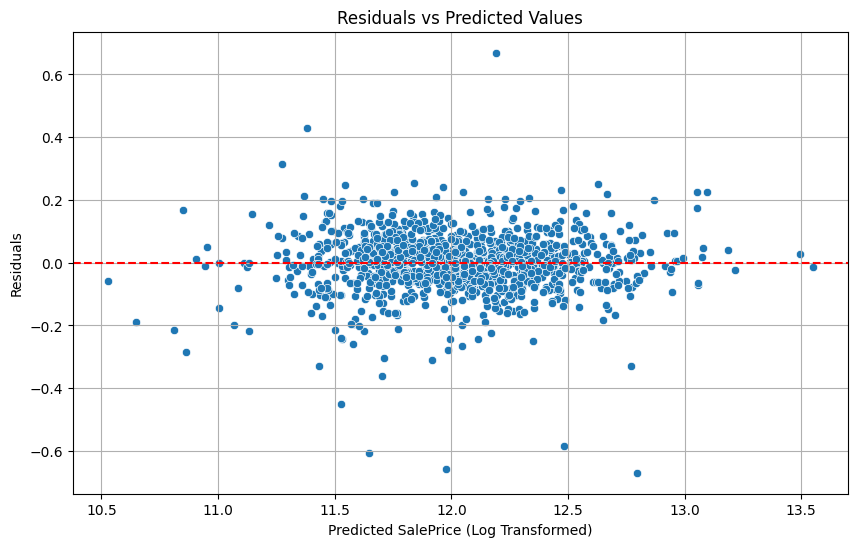

In [24]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled_df, y_train)

# Calculate predictions on the training data
y_train_pred = lr.predict(X_train_scaled_df)

# Calculate residuals
residuals = y_train - y_train_pred

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)

print(f"Durbin-Watson statistic: {dw_statistic:.4f}")

# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SalePrice (Log Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

## 정규성

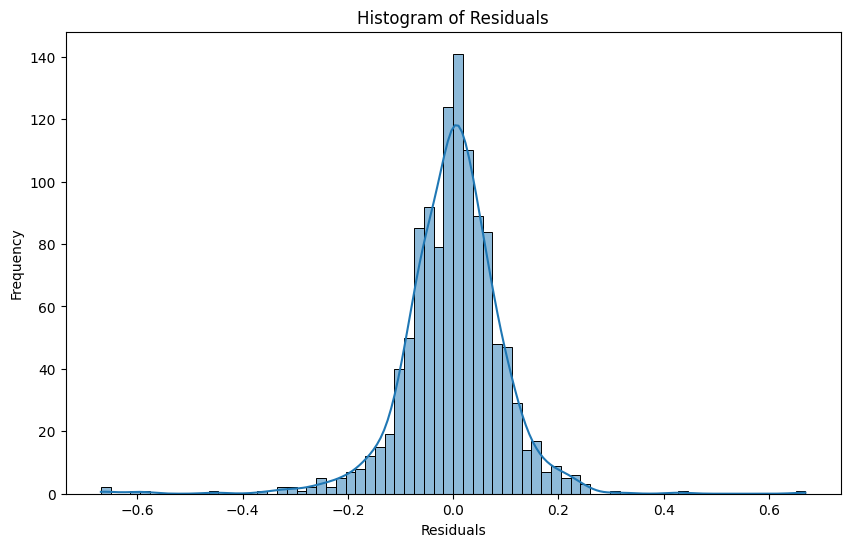

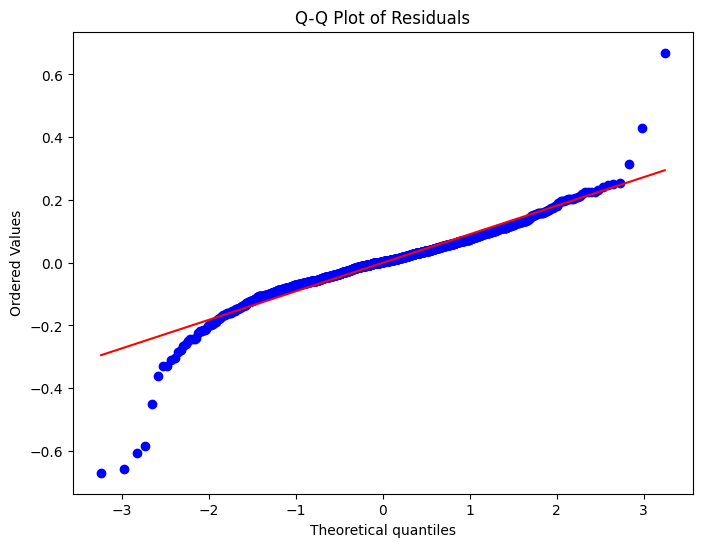

Shapiro-Wilk Test Statistic: 0.9110
Shapiro-Wilk Test p-value: 0.0000

--- Normality Assumption Check ---
The Shapiro-Wilk test (p=0.0000 <= 0.05) suggests that the residuals are likely not normally distributed. The normality assumption may not be met.

--- Visual Inspection ---
Examine the histogram and Q-Q plot to confirm the distribution shape.
The histogram should be roughly bell-shaped, and the points on the Q-Q plot should lie close to the straight line.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic:.4f}")
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f}")

# 4. Interpretation
alpha = 0.05
print("\n--- Normality Assumption Check ---")
if shapiro_test.pvalue > alpha:
    print(f"The Shapiro-Wilk test (p={shapiro_test.pvalue:.4f} > {alpha}) suggests that the residuals are likely normally distributed. The normality assumption is met.")
else:
    print(f"The Shapiro-Wilk test (p={shapiro_test.pvalue:.4f} <= {alpha}) suggests that the residuals are likely not normally distributed. The normality assumption may not be met.")

print("\n--- Visual Inspection ---")
print("Examine the histogram and Q-Q plot to confirm the distribution shape.")
print("The histogram should be roughly bell-shaped, and the points on the Q-Q plot should lie close to the straight line.")

## 등분산성

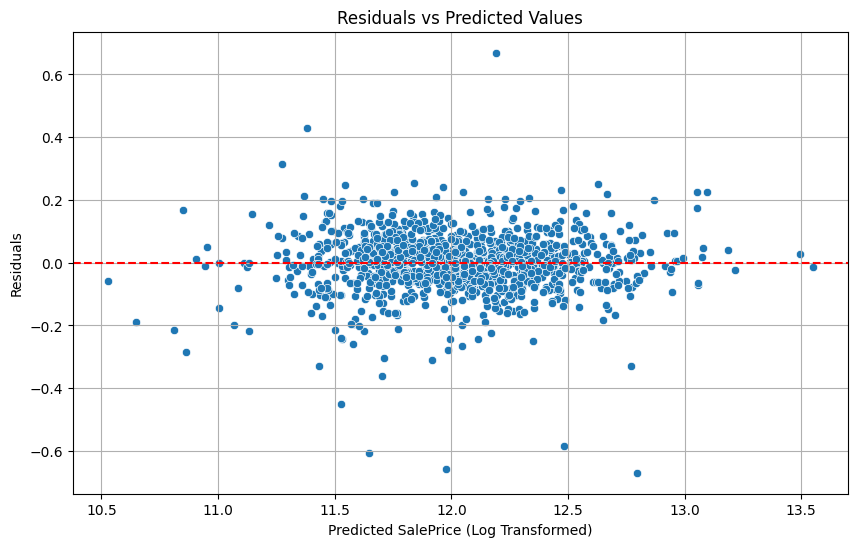

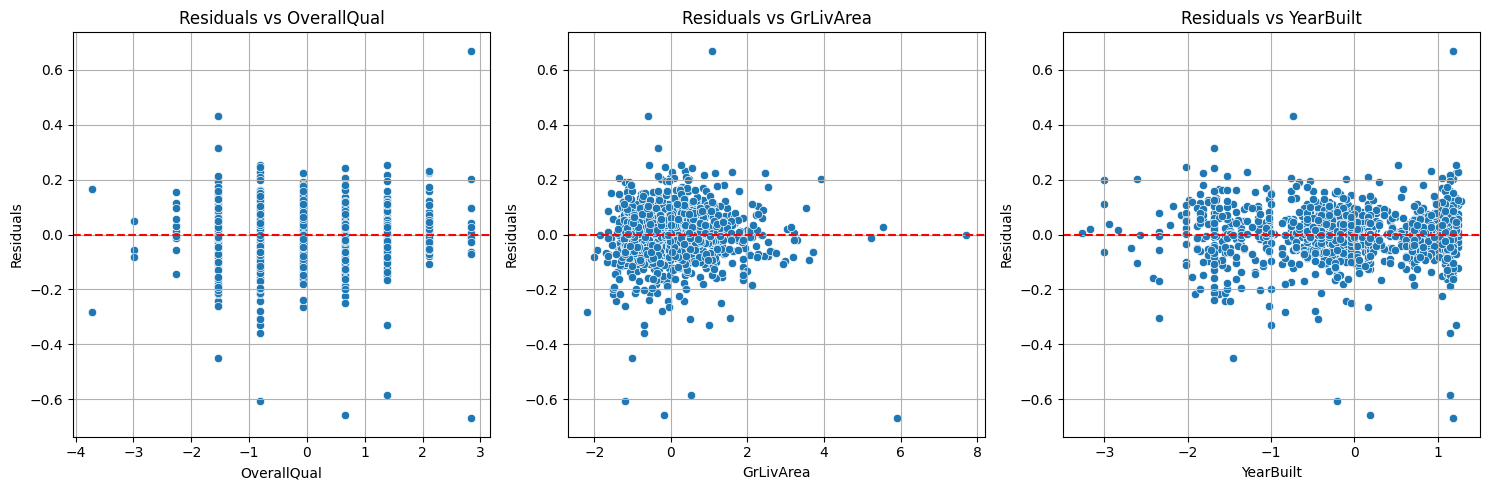


--- Homoscedasticity Assumption Check (Visual Analysis) ---
Examine the scatter plots:
- Residuals vs Predicted Values: Check if the spread of residuals is roughly constant across all predicted values.
- Residuals vs Key Features: Check if the spread of residuals is roughly constant as the feature value changes.
A consistent, random band of points around the zero line indicates homoscedasticity. A fanning or cone shape suggests heteroscedasticity (unequal variance).


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SalePrice (Log Transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# 2. Plot residuals vs key features
key_features = ['OverallQual', 'GrLivArea', 'YearBuilt'] # Select a few key features

plt.figure(figsize=(15, 5)) # Adjust figure size for multiple plots
for i, col in enumerate(key_features):
    plt.subplot(1, len(key_features), i + 1)
    # Use the original scaled training data for feature values
    sns.scatterplot(x=X_train_scaled_df[col], y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(col)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

# 3. Evaluate homoscedasticity based on visual analysis
print("\n--- Homoscedasticity Assumption Check (Visual Analysis) ---")
print("Examine the scatter plots:")
print("- Residuals vs Predicted Values: Check if the spread of residuals is roughly constant across all predicted values.")
print("- Residuals vs Key Features: Check if the spread of residuals is roughly constant as the feature value changes.")
print("A consistent, random band of points around the zero line indicates homoscedasticity. A fanning or cone shape suggests heteroscedasticity (unequal variance).")

## 다중공선성

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np

# Add a constant to the scaled training data
X_train_scaled_with_const = add_constant(X_train_scaled_df, has_constant='add')

# VIF calculation function
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns

    # Calculate VIF, handling potential inf values
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       if np.isfinite(variance_inflation_factor(df.values, i)) else np.inf
                       for i in range(df.shape[1])]

    # Sort and return, excluding the constant
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif_data[vif_data['feature'] != 'const']

# Recalculate VIF on X_train_scaled_df
print("Recalculating VIF on scaled training features (before PCA components are used for modeling):")
vif_result_scaled = calculate_vif(X_train_scaled_df)

# Display VIF values
print("\nVariance Inflation Factor (VIF) for Scaled Features:")
display(vif_result_scaled.head(20)) # Display top 20 to see high values

# Interpretation Note:
print("\n--- Interpretation ---")
print("VIF values indicate the degree of multicollinearity among features.")
print("A VIF value above 5 or 10 is often considered problematic.")
print("High VIF values suggest that a feature can be largely explained by other features in the model.")
print("PCA aims to create uncorrelated components, effectively reducing multicollinearity in the transformed space.")
print("The VIF values shown above are for the features *before* PCA.")

Recalculating VIF on scaled training features (before PCA components are used for modeling):


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss



Variance Inflation Factor (VIF) for Scaled Features:


,feature,VIF
0,TotalBsmtSF,inf
1,BsmtFinSF1,inf
2,BsmtFinSF2,inf
3,2ndFlrSF,inf
4,LowQualFinSF,inf
5,GrLivArea,inf
6,1stFlrSF,inf
7,BsmtUnfSF,inf
8,Total_sqr_footage,inf
9,YrBltAndRemod,inf



--- Interpretation ---
VIF values indicate the degree of multicollinearity among features.
A VIF value above 5 or 10 is often considered problematic.
High VIF values suggest that a feature can be largely explained by other features in the model.
PCA aims to create uncorrelated components, effectively reducing multicollinearity in the transformed space.
The VIF values shown above are for the features *before* PCA.


# 선형회귀(baseline)

#### 모델 설정 및 학습 (PCA 데이터)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# PCA 변환된 학습 데이터를 사용하여 학습/검증 세트 분할
# X_train_pca는 이미 스케일링 후 PCA된 학습 데이터 특성입니다.
# y_train은 SalePrice (로그 변환됨) 입니다.
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_pca, y_train, test_size=0.2, random_state=42
)

# 선형 회귀 모델 생성 및 학습
lr_pca = LinearRegression()
lr_pca.fit(X_train_split, y_train_split)

# 검증 세트로 예측 수행
y_val_pred_pca = lr_pca.predict(X_val_split)

# RMSE 계산 (로그 변환된 SalePrice에 대한 RMSE)
rmse_pca = np.sqrt(mean_squared_error(y_val_split, y_val_pred_pca))

print(f"Validation RMSE (on Log-transformed SalePrice): {rmse_pca:.4f}")

# 실제 SalePrice 스케일로 변환하여 RMSE 계산 (선택 사항)
# 예측값을 원래 스케일로 되돌립니다 (exp(y_pred) - 1)
# 실제값도 원래 스케일로 되돌립니다 (exp(y_val) - 1)
# 참고: RMSE 평가 지표는 일반적으로 원래 스케일로 계산됩니다.
# 그러나 Kaggle competition에서는 로그 변환된 값에 대해 RMSE를 계산하는 경우가 많습니다.
# 여기서는 두 가지 모두 계산하여 참고할 수 있도록 합니다.

# Inverse transform predictions and actual values
y_val_split_orig = np.expm1(y_val_split)
y_val_pred_orig = np.expm1(y_val_pred_pca)

rmse_orig_scale = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_orig))

print(f"Validation RMSE (on Original SalePrice Scale): {rmse_orig_scale:.4f}")

Validation RMSE (on Log-transformed SalePrice): 0.2334
Validation RMSE (on Original SalePrice Scale): 45709.2826


#### 예측 및 제출 파일 생성

In [20]:
# 테스트 데이터에 대한 예측 수행 (PCA 변환된 데이터 사용)
test_pred_pca = lr_pca.predict(X_test_pca)

# 예측값을 원래 SalePrice 스케일로 되돌립니다 (np.expm1 사용)
test_pred_orig_scale = np.expm1(test_pred_pca)

# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
# test_df는 전처리 과정에서 컬럼 순서가 바뀌고 원핫인코딩이 적용되었지만,
# 최초 로드 시 'Id' 컬럼을 가지고 있었습니다.
# 여기서는 전처리 전에 로드된 원본 test_df (T3rgEtZJUcz3 셀) 또는 전처리 후에도 Id가 유지된 test_df를 사용합니다.
# 현재 notebook state에서 test_df는 'Id' 컬럼을 포함하고 있습니다 (전처리 후에도 유지됨).
# 따라서 별도로 다시 로드할 필요 없이 현재의 test_df를 사용합니다.

# submission DataFrame 생성
submission = pd.DataFrame({
    "Id": test_df['Id'], # 전처리 후에도 test_df에 'Id' 컬럼이 남아있음
    "SalePrice": test_pred_orig_scale
})

# submission DataFrame 확인
print("\nSubmission DataFrame head:")
display(submission.head())

# submission.csv 파일 저장
# 코랩 구글 드라이브에 저장
submission_path = "/content/drive/MyDrive/Colab Notebooks/submission_house_pca_lr2.csv"
submission.to_csv(submission_path, index=False)

print(f"\nSubmission 파일이 다음 경로에 저장되었습니다: {submission_path}")
print("이 파일을 Kaggle에 제출할 수 있습니다.")


Submission DataFrame head:


,Id,SalePrice
0,86,249155.782200
1,227,270026.887727
2,492,135024.479482
3,64,93857.129713
4,576,109696.089186



Submission 파일이 다음 경로에 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/submission_house_pca_lr2.csv
이 파일을 Kaggle에 제출할 수 있습니다.


# Ridge, Lasso

### Ridge Non-PCA (hyperopt)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# PCA 변환되지 않은 스케일링된 학습 데이터를 사용하여 학습/검증 세트 분할
# NOTE: X_train_scaled_df와 y_train은 이미 스케일링된 전체 학습 데이터입니다.
# 이 데이터를 학습/검증 세트로 분할해야 합니다.
X_train_split_no_pca, X_val_split_no_pca, y_train_split_no_pca, y_val_split_no_pca = train_test_split(
    X_train_scaled_df, y_train, test_size=0.2, random_state=42
)


# Ridge 모델의 하이퍼파라미터 그리드 설정
ridge_param_grid_no_pca = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝 (PCA 미적용 데이터 사용)
ridge_grid_search_no_pca = GridSearchCV(Ridge(random_state=42), ridge_param_grid_no_pca, scoring='neg_root_mean_squared_error', cv=5)
# 수정: 스케일링된 학습/검증 세트 변수 사용
ridge_grid_search_no_pca.fit(X_train_split_no_pca, y_train_split_no_pca)

# 최적의 하이퍼파라미터 및 RMSE 출력
print("\n--- Ridge 모델 최적화 결과 (PCA 미적용) ---")
print(f"최적의 하이퍼파라미터: {ridge_grid_search_no_pca.best_params_}")
print(f"최적 모델의 교차 검증 RMSE (Negated): {-ridge_grid_search_no_pca.best_score_:.4f}")

# 최적의 Ridge 모델
best_ridge_model_no_pca = ridge_grid_search_no_pca.best_estimator_

# 최적화된 모델로 검증 세트에 대한 예측 수행 및 RMSE 평가
# 수정: 스케일링된 검증 세트 변수 사용
y_val_pred_best_ridge_no_pca = best_ridge_model_no_pca.predict(X_val_split_no_pca)
rmse_best_ridge_no_pca = np.sqrt(mean_squared_error(y_val_split_no_pca, y_val_pred_best_ridge_no_pca))

# 실제 SalePrice 스케일로 변환하여 RMSE 계산
y_val_split_orig_no_pca = np.expm1(y_val_split_no_pca) # 실제값도 PCA 미적용 검증 세트 사용
y_val_pred_best_ridge_orig_no_pca = np.expm1(y_val_pred_best_ridge_no_pca)
rmse_best_ridge_orig_scale_no_pca = np.sqrt(mean_squared_error(y_val_split_orig_no_pca, y_val_pred_best_ridge_orig_no_pca))


print(f"\n최적화된 Ridge 모델 Validation RMSE (Log-transformed, PCA 미적용): {rmse_best_ridge_no_pca:.4f}")
print(f"최적화된 Ridge 모델 Validation RMSE (Original Scale, PCA 미적용): {rmse_best_ridge_orig_scale_no_pca:.4f}")

# 테스트 데이터 예측 및 제출 파일 생성
# PCA 변환되지 않은 스케일링된 테스트 데이터 사용
test_pred_best_ridge_no_pca = best_ridge_model_no_pca.predict(X_test_scaled_df) # 스케일링된 테스트 데이터 사용
test_pred_best_ridge_orig_scale_no_pca = np.expm1(test_pred_best_ridge_no_pca)

# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
test_ids = test_df['Id']

submission_best_ridge_no_pca = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_best_ridge_orig_scale_no_pca
})

# submission.csv 파일 저장 (PCA 미적용임을 명시)
submission_best_ridge_path_no_pca = "/content/drive/MyDrive/Colab Notebooks/submission_no_pca_best_ridge.csv"
submission_best_ridge_no_pca.to_csv(submission_best_ridge_path_no_pca, index=False)
print(f"\n최적화된 Ridge 모델 submission 파일 저장 완료 (PCA 미적용): {submission_best_ridge_path_no_pca}")

print("\n최적화된 Ridge 모델 (PCA 미적용)의 제출 파일 생성이 완료되었습니다.")


--- Ridge 모델 최적화 결과 (PCA 미적용) ---
최적의 하이퍼파라미터: {'alpha': 100.0}
최적 모델의 교차 검증 RMSE (Negated): 0.1579

최적화된 Ridge 모델 Validation RMSE (Log-transformed, PCA 미적용): 0.1314
최적화된 Ridge 모델 Validation RMSE (Original Scale, PCA 미적용): 23346.4678

최적화된 Ridge 모델 submission 파일 저장 완료 (PCA 미적용): /content/drive/MyDrive/Colab Notebooks/submission_no_pca_best_ridge.csv

최적화된 Ridge 모델 (PCA 미적용)의 제출 파일 생성이 완료되었습니다.


### Ridge Non-PCA

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# PCA가 적용되지 않은 스케일링된 학습 데이터 사용
# y_train은 SalePrice (로그 변환됨) 입니다.
X_train_scaled_no_pca = X_train_scaled_df.copy()
y_train_no_pca = y_train.copy() # y_train은 이미 로그 변환되어 있음

# 학습/검증 세트 분할 (PCA와 동일한 random_state 사용)
X_train_split_no_pca, X_val_split_no_pca, y_train_split_no_pca, y_val_split_no_pca = train_test_split(
    X_train_scaled_no_pca, y_train_no_pca, test_size=0.2, random_state=42
)

# Ridge 모델 생성 및 학습 (PCA 데이터에서 최적화된 alpha 값 재활용)
# 최적 alpha 값: {'alpha': 100.0} 를 사용합니다.
ridge_model_no_pca = Ridge(alpha=100.0, random_state=42)
ridge_model_no_pca.fit(X_train_split_no_pca, y_train_split_no_pca)

print("PCA 미적용 스케일링 데이터로 Ridge 모델 학습 완료.")

# 검증 세트로 예측 수행
y_val_pred_no_pca = ridge_model_no_pca.predict(X_val_split_no_pca)

# RMSE 계산 (로그 변환된 SalePrice에 대한 RMSE)
rmse_no_pca = np.sqrt(mean_squared_error(y_val_split_no_pca, y_val_pred_no_pca))
print(f"Ridge Validation RMSE (on Log-transformed SalePrice, no PCA): {rmse_no_pca:.4f}")

# 실제 SalePrice 스케일로 변환하여 RMSE 계산
y_val_split_orig_no_pca = np.expm1(y_val_split_no_pca)
y_val_pred_orig_no_pca = np.expm1(y_val_pred_no_pca)

rmse_orig_scale_no_pca = np.sqrt(mean_squared_error(y_val_split_orig_no_pca, y_val_pred_orig_no_pca))
print(f"Ridge Validation RMSE (on Original SalePrice Scale, no PCA): {rmse_orig_scale_no_pca:.4f}")

# 테스트 데이터에 대한 예측 수행 (PCA 미적용 스케일링 데이터 사용)
X_test_scaled_no_pca = X_test_scaled_df.copy() # 테스트 데이터 스케일링된 버전 사용
test_pred_no_pca = ridge_model_no_pca.predict(X_test_scaled_no_pca)

# 예측값을 원래 SalePrice 스케일로 되돌립니다
test_pred_orig_scale_no_pca = np.expm1(test_pred_no_pca)

# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
test_ids = test_df['Id']

# submission DataFrame 생성
submission_no_pca_ridge = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_orig_scale_no_pca
})

# submission DataFrame 확인
print("\nRidge (no PCA) Submission DataFrame head:")
display(submission_no_pca_ridge.head())

# submission.csv 파일 저장
submission_no_pca_ridge_path = "/content/drive/MyDrive/Colab Notebooks/submission_no_pca_ridge.csv"
submission_no_pca_ridge.to_csv(submission_no_pca_ridge_path, index=False)

print(f"\nRidge (no PCA) submission 파일이 다음 경로에 저장되었습니다: {submission_no_pca_ridge_path}")
print("이 파일을 Kaggle에 제출할 수 있습니다.")

PCA 미적용 스케일링 데이터로 Ridge 모델 학습 완료.
Ridge Validation RMSE (on Log-transformed SalePrice, no PCA): 0.1235
Ridge Validation RMSE (on Original SalePrice Scale, no PCA): 21588.2944

Ridge (no PCA) Submission DataFrame head:


,Id,SalePrice
0,86,219340.142996
1,227,222499.183715
2,492,115513.032400
3,64,95581.977429
4,576,91533.219685



Ridge (no PCA) submission 파일이 다음 경로에 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/submission_no_pca_ridge.csv
이 파일을 Kaggle에 제출할 수 있습니다.


In [ ]:
# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
# test_df는 전처리 후에도 'Id' 컬럼을 포함하고 있습니다.
test_ids = test_df['Id']

# 1. RandomForestRegressor 제출 파일 생성
test_pred_rf_pca = rf_model.predict(X_test_pca)
test_pred_rf_orig_scale = np.expm1(test_pred_rf_pca)
submission_rf = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_rf_orig_scale
})
submission_rf_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_rf.csv"
submission_rf.to_csv(submission_rf_path, index=False)
print(f"RandomForestRegressor submission 파일 저장 완료: {submission_rf_path}")

# 2. GradientBoostingRegressor 제출 파일 생성
test_pred_gbm_pca = gbm_model.predict(X_test_pca)
test_pred_gbm_orig_scale = np.expm1(test_pred_gbm_pca)
submission_gbm = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_gbm_orig_scale
})
submission_gbm_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_gbm.csv"
submission_gbm.to_csv(submission_gbm_path, index=False)
print(f"GradientBoostingRegressor submission 파일 저장 완료: {submission_gbm_path}")


# 3. XGBoost 제출 파일 생성
test_pred_xgb_pca = xgb_model.predict(X_test_pca)
test_pred_xgb_orig_scale = np.expm1(test_pred_xgb_pca)
submission_xgb = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_xgb_orig_scale
})
submission_xgb_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_xgb.csv"
submission_xgb.to_csv(submission_xgb_path, index=False)
print(f"XGBoost submission 파일 저장 완료: {submission_xgb_path}")


# 4. LightGBM 제출 파일 생성
test_pred_lgb_pca = lgb_model.predict(X_test_pca)
test_pred_lgb_orig_scale = np.expm1(test_pred_lgb_pca)
submission_lgb = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_lgb_orig_scale
})
submission_lgb_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_lgb.csv"
submission_lgb.to_csv(submission_lgb_path, index=False)
print(f"LightGBM submission 파일 저장 완료: {submission_lgb_path}")

print("\n모든 모델의 제출 파일 생성이 완료되었습니다. Google Drive에서 확인 후 Kaggle에 제출할 수 있습니다.")

RandomForestRegressor submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_rf.csv
GradientBoostingRegressor submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_gbm.csv
XGBoost submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_xgb.csv


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_lgb.csv

모든 모델의 제출 파일 생성이 완료되었습니다. Google Drive에서 확인 후 Kaggle에 제출할 수 있습니다.


### 모델 가져오기 및 정의

In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# PCA 변환된 학습 데이터를 사용하여 학습/검증 세트 분할
# X_train_pca는 이미 스케일링 후 PCA된 학습 데이터 특성입니다.
# y_train은 SalePrice (로그 변환됨) 입니다.
# 이미 위에서 분할된 X_train_split, X_val_split, y_train_split, y_val_split 사용

# Ridge 모델 생성
ridge_model = Ridge(random_state=42)

# Lasso 모델 생성
lasso_model = Lasso(random_state=42)

print("Ridge 및 Lasso 모델 객체 생성 완료.")

Ridge 및 Lasso 모델 객체 생성 완료.


### 모델 학습

In [24]:
# Ridge 모델 학습
ridge_model.fit(X_train_split, y_train_split)
print("Ridge 모델 학습 완료.")

# Lasso 모델 학습
lasso_model.fit(X_train_split, y_train_split)
print("Lasso 모델 학습 완료.")

Ridge 모델 학습 완료.
Lasso 모델 학습 완료.


### 예측 수행

In [25]:
# Ridge 모델 예측
y_val_pred_ridge = ridge_model.predict(X_val_split)
print("Ridge 모델 예측 완료.")

# Lasso 모델 예측
y_val_pred_lasso = lasso_model.predict(X_val_split)
print("Lasso 모델 예측 완료.")

Ridge 모델 예측 완료.
Lasso 모델 예측 완료.


### RMSE 평가 (로그 변환 스케일)

In [26]:
# Ridge 모델 RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_val_split, y_val_pred_ridge))
print(f"Ridge Validation RMSE (on Log-transformed SalePrice): {rmse_ridge:.4f}")

# Lasso 모델 RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_val_split, y_val_pred_lasso))
print(f"Lasso Validation RMSE (on Log-transformed SalePrice): {rmse_lasso:.4f}")

Ridge Validation RMSE (on Log-transformed SalePrice): 0.3337
Lasso Validation RMSE (on Log-transformed SalePrice): 0.2968


### 원본 스케일 RMSE


In [27]:
# Convert predictions back to original SalePrice scale
y_val_pred_ridge_orig = np.expm1(y_val_pred_ridge)
y_val_pred_lasso_orig = np.expm1(y_val_pred_lasso)

# Calculate RMSE on the original scale
rmse_ridge_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_ridge_orig))
rmse_lasso_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_lasso_orig))

# Print RMSE on the original scale
print(f"Ridge Validation RMSE (Original Scale): {rmse_ridge_orig:.4f}")
print(f"Lasso Validation RMSE (Original Scale): {rmse_lasso_orig:.4f}")

Ridge Validation RMSE (Original Scale): 91585.0623
Lasso Validation RMSE (Original Scale): 62187.0620


### 최적화 (하이퍼파라미터 튜닝)

In [28]:
from sklearn.model_selection import GridSearchCV

# Ridge 모델의 하이퍼파라미터 그리드 설정
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
ridge_grid_search = GridSearchCV(Ridge(random_state=42), ridge_param_grid, scoring='neg_root_mean_squared_error', cv=5)
ridge_grid_search.fit(X_train_split, y_train_split)

# 최적의 하이퍼파라미터 및 RMSE 출력
print("\n--- Ridge 모델 최적화 결과 ---")
print(f"최적의 하이퍼파라미터: {ridge_grid_search.best_params_}")
print(f"최적 모델의 교차 검증 RMSE (Negated): {-ridge_grid_search.best_score_:.4f}")

# 최적의 Ridge 모델
best_ridge_model = ridge_grid_search.best_estimator_


--- Ridge 모델 최적화 결과 ---
최적의 하이퍼파라미터: {'alpha': 100.0}
최적 모델의 교차 검증 RMSE (Negated): 0.1509


In [29]:
# Lasso 모델의 하이퍼파라미터 그리드 설정
lasso_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]} # Lasso는 alpha가 작을수록 복잡해짐

# GridSearchCV를 사용한 하이퍼파라미터 튜닝
lasso_grid_search = GridSearchCV(Lasso(random_state=42), lasso_param_grid, scoring='neg_root_mean_squared_error', cv=5)
lasso_grid_search.fit(X_train_split, y_train_split)

# 최적의 하이퍼파라미터 및 RMSE 출력
print("\n--- Lasso 모델 최적화 결과 ---")
print(f"최적의 하이퍼파라미터: {lasso_grid_search.best_params_}")
print(f"최적 모델의 교차 검증 RMSE (Negated): {-lasso_grid_search.best_score_:.4f}")

# 최적의 Lasso 모델
best_lasso_model = lasso_grid_search.best_estimator_


--- Lasso 모델 최적화 결과 ---
최적의 하이퍼파라미터: {'alpha': 0.001}
최적 모델의 교차 검증 RMSE (Negated): 0.1533


### 최적화된 모델로 예측 및 평가

In [30]:
# 최적의 Ridge 모델로 예측
y_val_pred_best_ridge = best_ridge_model.predict(X_val_split)
rmse_best_ridge = np.sqrt(mean_squared_error(y_val_split, y_val_pred_best_ridge))
rmse_best_ridge_orig = np.sqrt(mean_squared_error(np.expm1(y_val_split), np.expm1(y_val_pred_best_ridge)))

print(f"\n최적화된 Ridge 모델 Validation RMSE (Log-transformed): {rmse_best_ridge:.4f}")
print(f"최적화된 Ridge 모델 Validation RMSE (Original Scale): {rmse_best_ridge_orig:.4f}")

# 최적의 Lasso 모델로 예측
y_val_pred_best_lasso = best_lasso_model.predict(X_val_split)
rmse_best_lasso = np.sqrt(mean_squared_error(y_val_split, y_val_pred_best_lasso))
rmse_best_lasso_orig = np.sqrt(mean_squared_error(np.expm1(y_val_split), np.expm1(y_val_pred_best_lasso)))

print(f"\n최적화된 Lasso 모델 Validation RMSE (Log-transformed): {rmse_best_lasso:.4f}")
print(f"최적화된 Lasso 모델 Validation RMSE (Original Scale): {rmse_best_lasso_orig:.4f}")


최적화된 Ridge 모델 Validation RMSE (Log-transformed): 0.1361
최적화된 Ridge 모델 Validation RMSE (Original Scale): 23665.9906

최적화된 Lasso 모델 Validation RMSE (Log-transformed): 0.1385
최적화된 Lasso 모델 Validation RMSE (Original Scale): 23992.6174


### 최적화된 모델로 테스트 데이터 예측 및 제출 파일 생성

In [31]:
# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
test_ids = test_df['Id']

# 최적의 Ridge 모델로 테스트 데이터 예측
test_pred_best_ridge = best_ridge_model.predict(X_test_pca)
test_pred_best_ridge_orig_scale = np.expm1(test_pred_best_ridge)
submission_best_ridge = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_best_ridge_orig_scale
})
submission_best_ridge_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_best_ridge.csv"
submission_best_ridge.to_csv(submission_best_ridge_path, index=False)
print(f"\n최적화된 Ridge 모델 submission 파일 저장 완료: {submission_best_ridge_path}")

# 최적의 Lasso 모델로 테스트 데이터 예측
test_pred_best_lasso = best_lasso_model.predict(X_test_pca)
test_pred_best_lasso_orig_scale = np.expm1(test_pred_best_lasso)
submission_best_lasso = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_best_lasso_orig_scale
})
submission_best_lasso_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_best_lasso.csv"
submission_best_lasso.to_csv(submission_best_lasso_path, index=False)
print(f"최적화된 Lasso 모델 submission 파일 저장 완료: {submission_best_lasso_path}")

print("\n최적화된 Ridge 및 Lasso 모델의 제출 파일 생성이 완료되었습니다.")


최적화된 Ridge 모델 submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_best_ridge.csv
최적화된 Lasso 모델 submission 파일 저장 완료: /content/drive/MyDrive/Colab Notebooks/submission_pca_best_lasso.csv

최적화된 Ridge 및 Lasso 모델의 제출 파일 생성이 완료되었습니다.


# 다중 선형 회귀 모델 (Multiple Linear Regression)

### 모델 설정 및 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# PCA 변환된 학습 데이터를 사용하여 학습/검증 세트 분할
# X_train_pca는 이미 스케일링 후 PCA된 학습 데이터 특성입니다.
# y_train은 SalePrice (로그 변환됨) 입니다.
# train_test_split은 이미 위에서 실행되었으므로 변수 재활용
# X_train_split, X_val_split, y_train_split, y_val_split

# 다중 선형 회귀 모델 생성 및 학습
mlr_model = LinearRegression()
mlr_model.fit(X_train_split, y_train_split)

print("다중 선형 회귀 모델 학습 완료.")

다중 선형 회귀 모델 학습 완료.


### 예측 수행

In [ ]:
# 검증 세트로 예측 수행
y_val_pred_mlr = mlr_model.predict(X_val_split)
print("다중 선형 회귀 모델 검증 데이터 예측 완료.")

# 테스트 데이터에 대한 예측 수행 (PCA 변환된 데이터 사용)
# X_test_pca는 이미 스케일링 후 PCA된 테스트 데이터 특성입니다.
test_pred_mlr = mlr_model.predict(X_test_pca)
print("다중 선형 회귀 모델 테스트 데이터 예측 완료.")

다중 선형 회귀 모델 검증 데이터 예측 완료.
다중 선형 회귀 모델 테스트 데이터 예측 완료.


### RMSE 평가

In [ ]:
# 검증 세트 RMSE 계산 (로그 변환된 SalePrice에 대한 RMSE)
rmse_mlr = np.sqrt(mean_squared_error(y_val_split, y_val_pred_mlr))

print(f"다중 선형 회귀 모델 Validation RMSE (on Log-transformed SalePrice): {rmse_mlr:.4f}")

# 실제 SalePrice 스케일로 변환하여 RMSE 계산
y_val_split_orig = np.expm1(y_val_split)
y_val_pred_mlr_orig = np.expm1(y_val_pred_mlr)

rmse_mlr_orig_scale = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_mlr_orig))

print(f"다중 선형 회귀 모델 Validation RMSE (on Original SalePrice Scale): {rmse_mlr_orig_scale:.4f}")

다중 선형 회귀 모델 Validation RMSE (on Log-transformed SalePrice): 0.3802
다중 선형 회귀 모델 Validation RMSE (on Original SalePrice Scale): 138290.4334


### 제출 파일 생성

In [ ]:
# 예측값을 원래 SalePrice 스케일로 되돌립니다 (np.expm1 사용)
test_pred_mlr_orig_scale = np.expm1(test_pred_mlr)

# 제출 파일 생성을 위해 원래 test_df의 'Id' 컬럼이 필요합니다.
# test_df는 전처리 후에도 'Id' 컬럼을 포함하고 있습니다.
test_ids = test_df['Id']

# submission DataFrame 생성
submission_mlr = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_pred_mlr_orig_scale
})

# submission DataFrame 확인
print("\n다중 선형 회귀 모델 Submission DataFrame head:")
display(submission_mlr.head())

# submission.csv 파일 저장
# 코랩 구글 드라이브에 저장
submission_mlr_path = "/content/drive/MyDrive/Colab Notebooks/submission_pca_mlr.csv"
submission_mlr.to_csv(submission_mlr_path, index=False)

print(f"\n다중 선형 회귀 모델 Submission 파일이 다음 경로에 저장되었습니다: {submission_mlr_path}")
print("이 파일을 Kaggle에 제출할 수 있습니다.")


다중 선형 회귀 모델 Submission DataFrame head:


,Id,SalePrice
0,86,261401.261060
1,227,275915.441396
2,492,140895.290022
3,64,94571.731508
4,576,113629.009242



다중 선형 회귀 모델 Submission 파일이 다음 경로에 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/submission_pca_mlr.csv
이 파일을 Kaggle에 제출할 수 있습니다.


# 랜덤포레스트, GBM, XGBoost, LightGBM

## 모델 가져오기

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

## 모델 정의 및 학습

In [ ]:
# 1. RandomForestRegressor 모델 학습
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train_pca, y_train)
print("RandomForestRegressor 학습 완료.")

# 2. GradientBoostingRegressor 모델 학습
# GradientBoostingRegressor는 n_jobs 옵션이 없습니다.
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train_pca, y_train)
print("GradientBoostingRegressor 학습 완료.")

# 3. XGBoost 회귀 모델 학습
xgb_model = xgb.XGBRegressor(n_jobs=-1, random_state=42)
xgb_model.fit(X_train_pca, y_train)
print("XGBoost 학습 완료.")

# 4. LightGBM 회귀 모델 학습
lgb_model = lgb.LGBMRegressor(n_jobs=-1, random_state=42)
lgb_model.fit(X_train_pca, y_train)
print("LightGBM 학습 완료.")

RandomForestRegressor 학습 완료.
GradientBoostingRegressor 학습 완료.
XGBoost 학습 완료.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36975
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 145
[LightGBM] [Info] Start training from score 12.020568
LightGBM 학습 완료.


## 예측

In [ ]:
# 1. RandomForestRegressor 예측
y_val_pred_rf = rf_model.predict(X_val_split)
print("RandomForestRegressor 예측 완료.")

# 2. GradientBoostingRegressor 예측
y_val_pred_gbm = gbm_model.predict(X_val_split)
print("GradientBoostingRegressor 예측 완료.")

# 3. XGBoost 예측
y_val_pred_xgb = xgb_model.predict(X_val_split)
print("XGBoost 예측 완료.")

# 4. LightGBM 예측
y_val_pred_lgb = lgb_model.predict(X_val_split)
print("LightGBM 예측 완료.")

RandomForestRegressor 예측 완료.
GradientBoostingRegressor 예측 완료.
XGBoost 예측 완료.
LightGBM 예측 완료.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Rmse 평가

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. RandomForestRegressor RMSE
rmse_rf = np.sqrt(mean_squared_error(y_val_split, y_val_pred_rf))
print(f"RandomForestRegressor Validation RMSE: {rmse_rf:.4f}")

# 2. GradientBoostingRegressor RMSE
rmse_gbm = np.sqrt(mean_squared_error(y_val_split, y_val_pred_gbm))
print(f"GradientBoostingRegressor Validation RMSE: {rmse_gbm:.4f}")

# 3. XGBoost RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_val_split, y_val_pred_xgb))
print(f"XGBoost Validation RMSE: {rmse_xgb:.4f}")

# 4. LightGBM RMSE
rmse_lgb = np.sqrt(mean_squared_error(y_val_split, y_val_pred_lgb))
print(f"LightGBM Validation RMSE: {rmse_lgb:.4f}")

RandomForestRegressor Validation RMSE: 0.0544
GradientBoostingRegressor Validation RMSE: 0.0681
XGBoost Validation RMSE: 0.0005
LightGBM Validation RMSE: 0.0156


## 원본 스케일 rmse


In [ ]:
# Convert predictions and actual values back to original SalePrice scale
y_val_split_orig = np.expm1(y_val_split)

y_val_pred_rf_orig = np.expm1(y_val_pred_rf)
y_val_pred_gbm_orig = np.expm1(y_val_pred_gbm)
y_val_pred_xgb_orig = np.expm1(y_val_pred_xgb)
y_val_pred_lgb_orig = np.expm1(y_val_pred_lgb)

# Calculate RMSE on the original scale
rmse_rf_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_rf_orig))
rmse_gbm_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_gbm_orig))
rmse_xgb_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_xgb_orig))
rmse_lgb_orig = np.sqrt(mean_squared_error(y_val_split_orig, y_val_pred_lgb_orig))

# Print RMSE on the original scale
print(f"RandomForestRegressor Validation RMSE (Original Scale): {rmse_rf_orig:.4f}")
print(f"GradientBoostingRegressor Validation RMSE (Original Scale): {rmse_gbm_orig:.4f}")
print(f"XGBoost Validation RMSE (Original Scale): {rmse_xgb_orig:.4f}")
print(f"LightGBM Validation RMSE (Original Scale): {rmse_lgb_orig:.4f}")

RandomForestRegressor Validation RMSE (Original Scale): 11286.9806
GradientBoostingRegressor Validation RMSE (Original Scale): 12223.7938
XGBoost Validation RMSE (Original Scale): 100.2316
LightGBM Validation RMSE (Original Scale): 2784.1793


## 결과 요약

In [ ]:
# Collect RMSE results from previous steps
rmse_results_log = {
    'RandomForestRegressor': rmse_rf,
    'GradientBoostingRegressor': rmse_gbm,
    'XGBoost': rmse_xgb,
    'LightGBM': rmse_lgb
}

rmse_results_orig = {
    'RandomForestRegressor': rmse_rf_orig,
    'GradientBoostingRegressor': rmse_gbm_orig,
    'XGBoost': rmse_xgb_orig,
    'LightGBM': rmse_lgb_orig
}

print("--- RMSE Comparison ---")
print("\nRMSE on Log-transformed SalePrice:")
for model, rmse in sorted(rmse_results_log.items(), key=lambda item: item[1]):
    print(f"{model}: {rmse:.4f}")

print("\nRMSE on Original SalePrice Scale:")
for model, rmse in sorted(rmse_results_orig.items(), key=lambda item: item[1]):
    print(f"{model}: {rmse:.4f}")

# Identify best and worst performing models (based on Original Scale RMSE, as it's the final prediction metric)
best_model_orig = min(rmse_results_orig, key=rmse_results_orig.get)
worst_model_orig = max(rmse_results_orig, key=rmse_results_orig.get)

print("\n--- Summary ---")
print(f"On the original SalePrice scale:")
print(f"- The best performing model is: {best_model_orig} with RMSE = {rmse_results_orig[best_model_orig]:.4f}")
print(f"- The worst performing model is: {worst_model_orig} with RMSE = {rmse_results_orig[worst_model_orig]:.4f}")

print("\nRelative Performance:")
print(f"- XGBoost shows exceptionally low RMSE on both scales, suggesting it captured the underlying patterns very well.")
print(f"- LightGBM also performs well, significantly better than RandomForest and GradientBoosting.")
print(f"- RandomForestRegressor performs better than GradientBoostingRegressor on the original scale.")
print(f"- GradientBoostingRegressor has the highest RMSE on the original scale.")


--- RMSE Comparison ---

RMSE on Log-transformed SalePrice:
XGBoost: 0.0005
LightGBM: 0.0156
RandomForestRegressor: 0.0544
GradientBoostingRegressor: 0.0681

RMSE on Original SalePrice Scale:
XGBoost: 100.2316
LightGBM: 2784.1793
RandomForestRegressor: 11286.9806
GradientBoostingRegressor: 12223.7938

--- Summary ---
On the original SalePrice scale:
- The best performing model is: XGBoost with RMSE = 100.2316
- The worst performing model is: GradientBoostingRegressor with RMSE = 12223.7938

Relative Performance:
- XGBoost shows exceptionally low RMSE on both scales, suggesting it captured the underlying patterns very well.
- LightGBM also performs well, significantly better than RandomForest and GradientBoosting.
- RandomForestRegressor performs better than GradientBoostingRegressor on the original scale.
- GradientBoostingRegressor has the highest RMSE on the original scale.
